In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import time
import random
import copy

from scipy import interp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import make_scorer #CHANGE (updated to be consistent with scikit_learn .24)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Input, Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import precision_score,accuracy_score, f1_score, recall_score, hamming_loss
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers
from keras import callbacks
from keras.wrappers.scikit_learn import KerasRegressor
from keras import backend as K

#%matplotlib inline
#import mpld3
#mpld3.enable_notebook()

print (pd.__version__)

######### DEFINITION OF GLOBAL VARIABLES #########
RUN_CONFIGURATION_LOOP = False

1.2.4


In [2]:
import os 
import sys
#sys.path.append('/')
import circuits


In [3]:
#These are super long functions to be hard coded because i dont have time to properly fix them, sorry bout it
#[(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 1.5, -0.5), (0, 1.5, 1.5)]
def graph_with_errs_d3(df):
    x_data = []
    z_data = []
    
    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        
        if df.loc[i].at["X0"] == -1:
            x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["Z3"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["X6"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
    #graph_df = pd.DataFrame(df["Labels"], x_data, z_data, columns=["Labels", "XSyn", "ZSyn"])
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df
        

def graph_with_errs_d5(df):
    x_data = []
    z_data = []
    
    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        if df.loc[i].at["X0"] == -1:
             x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["X3"] == -1:
            x_data[i].append((0, -0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 0.5, 3.5))
        if df.loc[i].at["Z6"] == -1:
            z_data[i].append((0, 0.5, 4.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X8"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["Z9"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        if df.loc[i].at["X10"] == -1:
            x_data[i].append((0, 1.5, 2.5))
        if df.loc[i].at["Z11"] == -1:
            z_data[i].append((0, 1.5, 3.5))
        if df.loc[i].at["Z12"] == -1:
            z_data[i].append((0, 2.5, 0.5))
        if df.loc[i].at["X13"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z14"] == -1:
            z_data[i].append((0, 2.5, 2.5))
        if df.loc[i].at["X15"] == -1:
            x_data[i].append((0, 2.5, 3.5))
        if df.loc[i].at["Z16"] == -1:
            z_data[i].append((0, 2.5, 4.5))
        if df.loc[i].at["Z17"] == -1:
            z_data[i].append((0, 3.5, -0.5))
        if df.loc[i].at["X18"] == -1:
            x_data[i].append((0, 3.5, 0.5))
        if df.loc[i].at["X19"] == -1:
            x_data[i].append((0, 4.5, 1.5))
        if df.loc[i].at["Z20"] == -1:
            z_data[i].append((0, 3.5, 1.5))
        if df.loc[i].at["X21"] == -1:
            x_data[i].append((0, 3.5, 2.5))
        if df.loc[i].at["X22"] == -1:
            x_data[i].append((0, 4.5, 3.5))
        if df.loc[i].at["Z23"] == -1:
            z_data[i].append((0, 3.5, 3.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
            
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df
    
def graph_with_errs_d7(df):
    x_data = []
    z_data = []

    for i in range(len(df)):
        x_data.append([])
        z_data.append([])
        
        if df.loc[i].at["X0"] == -1:
            x_data[i].append((0, -0.5, 0.5))
        if df.loc[i].at["Z1"] == -1:
            z_data[i].append((0, 0.5, 0.5))
        if df.loc[i].at["X2"] == -1:
            x_data[i].append((0, 0.5, 1.5))
        if df.loc[i].at["X3"] == -1:
            x_data[i].append((0, -0.5, 2.5))
        if df.loc[i].at["Z4"] == -1:
            z_data[i].append((0, 0.5, 2.5))
        if df.loc[i].at["X5"] == -1:
            x_data[i].append((0, 0.5, 3.5))
        if df.loc[i].at["X6"] == -1:
            x_data[i].append((0, -0.5, 4.5))
        if df.loc[i].at["Z7"] == -1:
            z_data[i].append((0, 0.5, 4.5))
        if df.loc[i].at["X8"] == -1:
            x_data[i].append((0, 0.5, 5.5))
        if df.loc[i].at["Z9"] == -1:
            z_data[i].append((0, 0.5, 6.5))
        if df.loc[i].at["Z10"] == -1:
            z_data[i].append((0, 1.5, -0.5))
        if df.loc[i].at["X11"] == -1:
            x_data[i].append((0, 1.5, 0.5))
        if df.loc[i].at["Z12"] == -1:
            z_data[i].append((0, 1.5, 1.5))
        if df.loc[i].at["X13"] == -1:
            x_data[i].append((0, 1.5, 2.5))
        if df.loc[i].at["Z14"] == -1:
            z_data[i].append((0, 1.5, 3.5))
        if df.loc[i].at["X15"] == -1:
            x_data[i].append((0, 1.5, 4.5))
        if df.loc[i].at["Z16"] == -1:
            z_data[i].append((0, 1.5, 5.5))
        if df.loc[i].at["Z17"] == -1:
            z_data[i].append((0, 2.5, 0.5))
        if df.loc[i].at["X18"] == -1:
            x_data[i].append((0, 2.5, 1.5))
        if df.loc[i].at["Z19"] == -1:
            z_data[i].append((0, 2.5, 2.5))
        if df.loc[i].at["X20"] == -1:
            x_data[i].append((0, 2.5, 3.5))
        if df.loc[i].at["Z21"] == -1:
            z_data[i].append((0, 2.5, 4.5))
        if df.loc[i].at["X22"] == -1:
            x_data[i].append((0, 2.5, 5.5))
        if df.loc[i].at["Z23"] == -1:
            z_data[i].append((0, 2.5, 6.5))
        if df.loc[i].at["Z24"] == -1:
            z_data[i].append((0, 3.5, -0.5))
        if df.loc[i].at["X25"] == -1:
            x_data[i].append((0, 3.5, 0.5))
        if df.loc[i].at["Z26"] == -1:
            z_data[i].append((0, 3.5, 1.5))
        if df.loc[i].at["X27"] == -1:
            x_data[i].append((0, 3.5, 2.5))
        if df.loc[i].at["Z28"] == -1:
            z_data[i].append((0, 3.5, 3.5))
        if df.loc[i].at["X29"] == -1:
            x_data[i].append((0, 3.5, 4.5))
        if df.loc[i].at["Z30"] == -1:
            z_data[i].append((0, 3.5, 5.5))
        if df.loc[i].at["Z31"] == -1:
            z_data[i].append((0, 4.5, 0.5))
        if df.loc[i].at["X32"] == -1:
            x_data[i].append((0, 4.5, 1.5))
        if df.loc[i].at["Z33"] == -1:
            z_data[i].append((0, 4.5, 2.5))
        if df.loc[i].at["X34"] == -1:
            x_data[i].append((0, 4.5, 3.5))
        if df.loc[i].at["Z35"] == -1:
            z_data[i].append((0, 4.5, 4.5))
        if df.loc[i].at["X36"] == -1:
            x_data[i].append((0, 4.5, 5.5))
        if df.loc[i].at["Z37"] == -1:
            z_data[i].append((0, 4.5, 6.5))
        if df.loc[i].at["Z38"] == -1:
            z_data[i].append((0, 5.5, -0.5))
        if df.loc[i].at["X39"] == -1:
            x_data[i].append((0, 5.5, 0.5))
        if df.loc[i].at["X40"] == -1:
            x_data[i].append((0, 6.5, 1.5))
        if df.loc[i].at["Z41"] == -1:
            z_data[i].append((0, 5.5, 1.5))
        if df.loc[i].at["X42"] == -1:
            x_data[i].append((0, 5.5, 2.5))
        if df.loc[i].at["X43"] == -1:
            x_data[i].append((0, 6.5, 3.5))
        if df.loc[i].at["Z44"] == -1:
            z_data[i].append((0, 5.5, 3.5))
        if df.loc[i].at["X45"] == -1:
            x_data[i].append((0, 5.5, 4.5))
        if df.loc[i].at["X46"] == -1:
            x_data[i].append((0, 6.5, 5.5))
        if df.loc[i].at["Z47"] == -1: 
            z_data[i].append((0, 5.5, 5.5))
        x_data[i] = str(x_data[i])
        z_data[i] = str(z_data[i])
    graph_df = pd.DataFrame({"XSyn":x_data, "ZSyn":z_data})
    return graph_df

In [4]:
#These functions needed to work with the GraphDecoder/MWPM module
import time

def add_measurement_errs(curr_syn, prob_err, x_syn, depth):
    #x_syn is True if it is x syndrome, False if it is Z syndrome
    total_time = 0
    new_syn = []
    if x_syn:
        for i in curr_syn:
            rand = random.random()
            if rand > prob_err:
                new_syn.append(i)
        return (new_syn + return_xmeasurement_errs(depth, prob_err))
    else:
        for i in curr_syn:
            rand = random.random()
            if rand > prob_err:
                new_syn.append(i)
        return (new_syn + return_zmeasurement_errs(depth, prob_err))
    
def do_new_decoding(data, depth, prob_err):
    decoder = circuits.GraphDecoder(depth,1)
    G = decoder.S['Z']
    #decoder.graph_2D(G,'distance')
    df = pd.DataFrame()
    syn = []
    total_time = 0
    
    for row in data:
        x_input = []
        z_input = []
        x_type = True
        for col in row:
            if not col == "[]":
                col = eval(col)
                for c in col:
                    if x_type:
                        x_input.append(c)
                    else:
                        z_input.append(c)
            x_type = not x_type  
            
        if prob_err > 0:
            syndromes_x = add_measurement_errs(x_input, prob_err, True, depth)
            syndromes_z = add_measurement_errs(z_input, prob_err, False, depth)
        else:
            syndromes_x = x_input
            syndromes_z = z_input

        start = time.time_ns()
        error_graph_x, paths_x = decoder.make_error_graph(syndromes_x,'X')
        matching_graph_x = decoder.matching_graph(error_graph_x,'X')
        matches_x = decoder.matching(matching_graph_x,'X')
        flips_x = decoder.calculate_qubit_flips(matches_x, paths_x,'X')
        syn_x = (translate_errors(flips_x))

        error_graph_z, paths_z = decoder.make_error_graph(syndromes_z,'Z')
        matching_graph_z = decoder.matching_graph(error_graph_z,'Z')
        matches_z = decoder.matching(matching_graph_z,'Z')
        flips_z = decoder.calculate_qubit_flips(matches_z, paths_z,'Z')
        syn_z = translate_errors(flips_z)
        df = df.append(pd.Series([syn_x, syn_z]), ignore_index=True)
        end = time.time_ns()
        total_time += (end - start)/ (10 ** 9)
    return (df, total_time) 

import random
def return_xmeasurement_errs(depth, prob):
    
    new_errs = []
    
    if depth == 3:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, 1.5, 0.5), (0, 2.5, 1.5)]
    elif depth == 5:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, -0.5, 2.5), (0, 0.5, 3.5), (0, 1.5, 0.5), (0, 1.5, 2.5),
                        (0, 2.5, 1.5), (0, 2.5, 3.5), (0, 3.5, 0.5), (0, 4.5, 1.5), (0, 3.5, 2.5), (0, 4.5, 3.5)]
    else:
        errs = [(0, -0.5, 0.5), (0, 0.5, 1.5), (0, -0.5, 2.5), (0, 0.5, 3.5), (0, -0.5, 4.5), (0, 0.5, 5.5),
                        (0, 1.5, 0.5), (0, 1.5, 2.5), (0, 1.5, 4.5), (0, 2.5, 1.5), (0, 2.5, 3.5), (0, 2.5, 5.5),
                        (0, 3.5, 0.5),  (0, 3.5, 2.5), (0, 3.5, 4.5), (0, 4.5, 1.5), (0, 4.5, 3.5), (0, 4.5, 5.5),
                       (0, 5.5, 0.5), (0, 6.5, 1.5), (0, 5.5, 2.5), (0, 6.5, 3.5), (0, 5.5, 4.5), (0, 6.5, 5.5)]
    for e in errs:
        rand = random.random()
        if rand <= prob:
            new_errs.append(e)
            
    return new_errs
            

def return_zmeasurement_errs(depth, prob):
    
    new_errs = []
    
    if depth == 3:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 1.5, -0.5), (0, 1.5, 1.5)]
    elif depth == 5:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 0.5, 4.5), (0, 1.5, -0.5), (0, 1.5, 1.5), (0, 1.5, 3.5),
                        (0, 2.5, 0.5), (0, 2.5, 2.5), (0, 2.5, 4.5), (0, 3.5, -0.5), (0, 3.5, 1.5), (0, 3.5, 3.5)]
    else:
        errs = [(0, 0.5, 0.5), (0, 0.5, 2.5), (0, 0.5, 4.5), (0, 0.5, 6.5), (0, 1.5, -0.5), (0, 1.5, 1.5),
                        (0, 1.5, 3.5), (0, 1.5, 5.5), (0, 2.5, 0.5), (0, 2.5, 2.5), (0, 2.5, 4.5), (0, 2.5, 6.5),
                        (0, 3.5, -0.5),  (0, 3.5, 1.5), (0, 3.5, 3.5), (0, 3.5, 5.5), (0, 4.5, 0.5), (0, 4.5, 2.5),
                       (0, 4.5, 4.5), (0, 4.5, 6.5), (0, 5.5, -0.5), (0, 5.5, 1.5), (0, 5.5, 3.5), (0, 5.5, 5.5)]
        
    for e in errs:
        rand = random.random()
        if rand <= prob:
            new_errs.append(e)
            
    return new_errs

def translate_errors (phys_errs):
    flipX = np.array([(0, 1),(1, 0)])
    flipZ = np.array([(1, 0), (0, -1)])
    errs = []
    str2 = ""
    for qubit, flip in phys_errs.items():
        row = int(qubit[1])
        col = int(qubit[2])
        if str(flip) == "X":
            str1 = "X"
        elif str(flip) == "Z":
            str1 = "Z"
        else:
            str1 = "X"
            str2 = "Z"
        str1 += str(row) + str(col)
        errs.append(str1)
        if str2 != "":
            str2 += str(row) +str(col)
            errs.append(str2)
            str2 = ""
    return errs   

def translate_to_graph(df_graph, labels, mlb):
#go through labels given
    indices = []
    labels = mlb.inverse_transform(labels)
    
    for row in labels:
        label_str = str(row)
        for index, r in df_graph.iterrows():
            if label_str == "('',)":
                if str(r["Labels"]) == "[' ']":
                    indices.append([index])
                    break
            if set(row) == set(r["Labels"]):
                indices.append([index])
                break

    df_syns = df_graph.drop(['Labels'], axis=1)
    return_df = pd.DataFrame()
    for i in indices:
        return_df = return_df.append(df_syns.loc[i])
    return return_df

In [5]:
#Function needed for preprocessing. CSV file reads in a string, needs to be a list for labels 
#for preprocessing csv files
def create_list_from_string(err_list):
    newstring = err_list.replace("'", "")
    new_err_list = newstring.strip('][').split(', ')
    return sorted(set(new_err_list))


def create_string_from_list(err_list):
    return_string = "["
    if err_list[0] == "''":
        return "[' ']"
    else:
        for index, i in enumerate(err_list):
            return_string = return_string +  "'" + i + "'"
            if index < (len(err_list)-1):
                return_string += ", "
    return return_string + "]"
        

#take in two 2d arrays of predicted values, true values, and threshold to determine labels. 
#calculates the partial accuracy of the predicted values, averaged out for all obersvations
def partial_accuracy(y_pred, y_true):
    total = 0
    rows = y_pred.shape[0]
    cols = y_pred.shape[1]
    for i in range(0, rows):
        row_correct = 0
        for j in range(0, cols):
            if y_pred[i,j] == y_true[i,j]:
                row_correct += 1
        total += row_correct/cols
    return total/rows

def partial_accuracy_and_contingency(y_pred, y_true, mlb):
    total = 0
    a= np.zeros(shape=y_true.shape)
    rows = y_pred.shape[0]
    cols = y_pred.shape[1]
    df = pd.DataFrame(a, columns = mlb.classes_)
    for i in range(0, rows):
        row_correct = 0
        for j, label in enumerate(mlb.classes_):
            if y_pred[i,j] == y_true[i,j]:
                row_correct += 1
                df.at[i, label] = 1
            else:
                df.at[i, label] = 0

        total += row_correct/cols

    return (total/rows, df)

def contingency_table_and_t (clf1, clf2):
    a = 0 #clf1 pos, clf2 pos
    b = 0 #clf1 pos, clf2 neg
    c = 0 #clf1 neg, clf2 pos
    d = 0 #clf1 neg, clf2 neg
    
    for index, value in clf1.items():
        if value == 1 and clf2[index] == 1:
            a+=1
        elif value == 1 and clf2[index] == 0: #classifier 1 right, classifier 2 wrong
            b+=1
        elif value == 0 and clf2[index] == 1: #classifier 1 wrong, classifier 2 right
            c+=1
        else:
            d+=1
    print("["+str(a)+", "+str(b)+"]")
    print("["+str(c)+", "+str(d)+"]")
    if b == 0 and c ==0:
        print("both b and c are zero")
        t=0
    else:
        t = (((b-c)-1)**2)/(b+c)
    return ([[a,b],[c,d]], t)

def add_noise(val, noise_level):
    rand = random.uniform(0, 1)
    if rand <= noise_level:
        if val == -1:
            val = 1
        elif val == 1:
            val = -1
    return val

In [6]:
#x_d7= trainData_d7.dropna()
#######################################################################################################

trainData_d7 = pd.read_csv("depth7_all_combos.csv")
trainData_d7 = trainData_d7.applymap(lambda x: add_noise(x,.01))

#These four lines remove duplicates
trainData_d7['Labels'] = trainData_d7['Labels'].map(lambda x: create_list_from_string(x))
trainData_d7['Labels'] = trainData_d7['Labels'].astype(str)
trainData_d7 = trainData_d7.drop_duplicates('Labels', keep='first', ignore_index=True)
trainData_d7['Labels'] = trainData_d7['Labels'].map(lambda x: create_list_from_string(x))

testData_d7_MWPM = graph_with_errs_d7(trainData_d7)

#transforms the data to encoding for ML
mlb_d7 = MultiLabelBinarizer()
mlb_d7.fit(trainData_d7['Labels'])
df = pd.DataFrame(mlb_d7.transform(trainData_d7['Labels']))
df['Labels']= df.values.tolist()
trainData_d7 = trainData_d7.drop(['Labels'], axis=1)
trainData_d7 = pd.concat([df["Labels"],testData_d7_MWPM, trainData_d7], axis=1, ignore_index=True)
trainData_d7.columns = ["Labels","XSyn", "ZSyn","X0", "Z1", "X2", "X3", "Z4", "X5", "X6", "Z7", "X8", "Z9", "Z10", "X11", "Z12", "X13", "Z14", "X15", "Z16", "Z17", "X18", "Z19","X20", "Z21", "X22", "Z23", "Z24", "X25", "Z26", "X27", "Z28", "X29", "Z30", "Z31", "X32", "Z33", "X34", "Z35", "X36", "Z37", "Z38", "X39", "X40", "Z41", "X42", "X43", "Z44", "X45", "X46", "Z47"]

#######################################################################################

trainData_d5 = pd.read_csv("depth5_all_combos.csv")
trainData_d5 = trainData_d5.applymap(lambda x: add_noise(x,.01)) #was .05
#These four lines remove duplicates
trainData_d5['Labels'] = trainData_d5['Labels'].map(lambda x: create_list_from_string(x))
trainData_d5['Labels'] = trainData_d5['Labels'].astype(str)
trainData_d5 = trainData_d5.drop_duplicates('Labels', keep='first', ignore_index=True)
trainData_d5['Labels'] = trainData_d5['Labels'].map(lambda x: create_list_from_string(x))


testData_d5_MWPM = graph_with_errs_d5(trainData_d5)


#transforms the data to encoding for ML
mlb = MultiLabelBinarizer()
mlb.fit(trainData_d5['Labels'])
df = pd.DataFrame(mlb.transform(trainData_d5['Labels']))
df['Labels']= df.values.tolist()
trainData_d5 = trainData_d5.drop(['Labels'], axis=1)
trainData_d5 = pd.concat([df["Labels"], testData_d5_MWPM, trainData_d5], axis=1, ignore_index=True)
trainData_d5.columns = ["Labels","XSyn", "ZSyn","X0","Z1","X2","X3","Z4","X5","Z6","Z7","X8","Z9","X10","Z11","Z12","X13","Z14","X15","Z16","Z17","X18","X19","Z20","X21","X22","Z23"]
#########################################################################################

#Has no duplicates, small enough to check manually
trainData_d3 = pd.read_csv("depth3_all_combos.csv")

trainData_d3["Labels"] = trainData_d3['Labels'].map(lambda x: create_list_from_string(x))
trainData_d3 = trainData_d3.applymap(lambda x: add_noise(x,.01))

testData_d3_MWPM = graph_with_errs_d3(trainData_d3)

mlb_d3 = MultiLabelBinarizer()
mlb_d3.fit(trainData_d3["Labels"])
df = pd.DataFrame(mlb_d3.transform(trainData_d3['Labels']))
df['Labels']= df.values.tolist()
trainData_d3 = trainData_d3.drop(['Labels'], axis=1)
trainData_d3 = pd.concat([df['Labels'], testData_d3_MWPM, trainData_d3], axis=1, ignore_index=True)
trainData_d3.columns = ["Labels","XSyn", "ZSyn", "X0", "Z1", "X2", "Z3", "Z4", "X5", "X6", "Z7"]
#########################################################################################
y_d3 = trainData_d3["Labels"]
x_d3 = trainData_d3.drop(["Labels"], axis=1)

y_d5 = trainData_d5["Labels"] 
x_d5 = trainData_d5.drop(["Labels"], axis=1) 

y_d7 = trainData_d7["Labels"]
x_d7 = trainData_d7.drop(["Labels"], axis=1)


x_d3 = x_d3.replace([-1], 0)
x_d5 = x_d5.replace([-1], 0)
x_d7 = x_d7.replace([-1], 0)

In [7]:
y_d7 = trainData_d7["Labels"] 

In [8]:
#functions for creating lookup tables here:
from collections import defaultdict
from math import log2

def generateAllBinaryStrings(n, arr, i, lookup):  
    if i == n: 
        lookup.setBitStringArray(arr, n)  
        return
      
    # First assign "0" at ith position  
    # and try for all other permutations  
    # for remaining positions  
    arr[i] = 0
    generateAllBinaryStrings(n, arr, i + 1, lookup)  
  
    # And then assign "1" at ith position  , 
    # and try for all other permutations  
    # for remaining positions  
    arr[i] = 1
    generateAllBinaryStrings(n, arr, i + 1, lookup)

class lookup_decoder:
    
    def __init__(self, depth):
        #self.lookupTable = defaultdict()
        self.lookupTable = {}
        self.distributions = {}
        self.depth = depth
        #generating all possible syndrome observations
        #arr = [None] * (depth**2 - 1)
        #generateAllBinaryStrings((depth**2 - 1), arr, 0, self)
        
    def setBitStringArray(self, arr, n): 
        new_str = ""
        for i in range(0, n):  
            new_str += str(arr[i])
        self.lookupTable.update({new_str:defaultdict()})  
        
    def update_table (self, syndrome, phys_errs):
        #all the keys are made in the init, so simply update the physical error combinations for the given syndrome
        if syndrome not in self.lookupTable:
            self.lookupTable[syndrome] = {}
            self.lookupTable[syndrome][phys_errs] = 1
            return
        
        if phys_errs not in self.lookupTable[syndrome]:
            self.lookupTable[syndrome].update({phys_errs: 1})
        else:
            self.lookupTable[syndrome][phys_errs] += 1
     
    def get_probable_error(self, syndrome):
        return_key = []

        if syndrome not in self.lookupTable.keys():
            for i in range(2* int(self.depth**2) + 1):
                return_key.append(0)
            return return_key
        
        key, value = max(self.lookupTable[syndrome].items(), key=lambda x:x[1])
        
        for character in key:
            if character == '0' or character == '1':
                return_key.append(int(character))
                
        return return_key
        
    def make_distribution_graph(self, syn):
        
        plt.bar(list(self.lookupTable[syn].keys()), self.lookupTable[syn].values(), color='g')
        plt.show()
        
    def syndrome_count_graph(self):
        graph_dict = {}
        for syn in self.lookupTable:
            graph_dict.update({syn:sum(self.lookupTable[syn].values())})
        plt.ylim((0,4))
        plt.bar(graph_dict.keys(), graph_dict.values())
        plt.show()
        
    
    def length_of_lookup(self):
        print(len(self.lookupTable))
        
            
    def get_entropies(self):
        entropies = {}
        for syn in self.lookupTable:
            total = sum(self.lookupTable[syn].values())
            h = 0
            for key in self.lookupTable[syn]:
                p = self.lookupTable[syn][key]/total
                h += p+log2(p)
            entropies[syn] = -h
        print(entropies)
            
    def get_syndromes(self):
        return self.lookupTable.keys()
                     
    def print_lookup(self):
        for syn in self.lookupTable:
            print(self.lookupTable[syn])

In [9]:
def train_plut(table, data_x, data_y):
    i = 0
    for index, x in enumerate(data_x):
        syn = "".join([str(i) for i in x])
        syn = syn.replace(".0","")
        labels = np.array2string(np.array(data_y[i]), precision=1, separator='',suppress_small=True).replace("[","").replace("]","")
        table.update_table(syn, labels)
        i+=1
    return table


def test_plut(table, test_set):
    predictions_lookup = []
    for index, x in enumerate(test_set):
        syn_x = "".join([str(i) for i in x])
        syn_x = syn_x.replace(".0","")
        predictions_lookup.append(table.get_probable_error(syn_x))
    return np.array(predictions_lookup)

In [14]:
def compile_FFNN_model_DepthThree(depth):
    model = Sequential()
    layers = 2
    #input layer
    model.add(Dense(8, activation='relu'))
    
    #hidden layers go here
    for i in range(layers):
        model.add(Dense(32, activation='relu'))
    
    model.add(Dense(19 , activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
                  metrics=['accuracy']) #CHANGE  (added tf., changed lr to learning_rate)
    return model

#make any needed changes here
def compile_FFNN_model_DepthFive(depth):
    model = Sequential()
    layers = 4
    
    #input layer
    model.add(Dense(24, activation='relu'))
    
    #hidden layers go here
    for i in range(layers):
        model.add(Dense(240, activation='relu'))
    
    #model.add(Dense((2*depth**2) , activation='sigmoid'))
    model.add(Dense(51, activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
                  metrics=['accuracy']) #CHANGE (added tf.)
    return model


#make any needed changes here
def compile_FFNN_model_DepthSeven(depth):
    model = Sequential()
    layers = 4
    
    #input layer
    model.add(Dense(48, activation='relu'))
    
    #hidden layers go here
    for i in range(layers):
        model.add(Dense(400, activation='relu'))
    
    #model.add(Dense((2*depth**2) , activation='sigmoid'))
    model.add(Dense(99, activation='sigmoid'))
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
                  metrics=['accuracy']) #CHANGE  (added tf.)
    return model


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/200
1/1 [==============================] - 1s 509ms/step - loss: 0.6542 - accuracy: 0.1176 - val_loss: 0.6586 - val_accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 21ms/step - loss: 0.6520 - accuracy: 0.1176 - val_loss: 0.6566 - val_accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 56ms/step - loss: 0.6497 - accuracy: 0.1176 - val_loss: 0.6547 - val_accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 22ms/step - loss: 0.6474 - accuracy: 0.1176 - val_loss: 0.6527 - val_accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 28ms/step - loss: 0.6450 - accuracy: 0.1176 - val_loss: 0.6506 - val_accuracy: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 25ms/step - loss: 0.6426 - accuracy: 0.1176 - val_loss: 0.6486 - val_accuracy: 0.0000e+00
Epoch 7/200
1/1 [=====================

1/1 [==============================] - 0s 27ms/step - loss: 0.4669 - accuracy: 0.1176 - val_loss: 0.4980 - val_accuracy: 0.2000
Epoch 59/200
1/1 [==============================] - 0s 24ms/step - loss: 0.4625 - accuracy: 0.1176 - val_loss: 0.4943 - val_accuracy: 0.2000
Epoch 60/200
1/1 [==============================] - 0s 24ms/step - loss: 0.4581 - accuracy: 0.1176 - val_loss: 0.4905 - val_accuracy: 0.2000
Epoch 61/200
1/1 [==============================] - 0s 23ms/step - loss: 0.4537 - accuracy: 0.1176 - val_loss: 0.4868 - val_accuracy: 0.2000
Epoch 62/200
1/1 [==============================] - 0s 27ms/step - loss: 0.4493 - accuracy: 0.1176 - val_loss: 0.4830 - val_accuracy: 0.2000
Epoch 63/200
1/1 [==============================] - 0s 25ms/step - loss: 0.4449 - accuracy: 0.1176 - val_loss: 0.4792 - val_accuracy: 0.2000
Epoch 64/200
1/1 [==============================] - 0s 26ms/step - loss: 0.4404 - accuracy: 0.1176 - val_loss: 0.4755 - val_accuracy: 0.2000
Epoch 65/200
1/1 [========

1/1 [==============================] - 0s 27ms/step - loss: 0.2671 - accuracy: 0.0588 - val_loss: 0.3398 - val_accuracy: 0.2000
Epoch 117/200
1/1 [==============================] - 0s 37ms/step - loss: 0.2657 - accuracy: 0.0588 - val_loss: 0.3389 - val_accuracy: 0.2000
Epoch 118/200
1/1 [==============================] - 0s 34ms/step - loss: 0.2643 - accuracy: 0.0588 - val_loss: 0.3381 - val_accuracy: 0.2000
Epoch 119/200
1/1 [==============================] - 0s 26ms/step - loss: 0.2630 - accuracy: 0.0588 - val_loss: 0.3373 - val_accuracy: 0.2000
Epoch 120/200
1/1 [==============================] - 0s 26ms/step - loss: 0.2617 - accuracy: 0.0588 - val_loss: 0.3366 - val_accuracy: 0.2000
Epoch 121/200
1/1 [==============================] - 0s 25ms/step - loss: 0.2605 - accuracy: 0.0588 - val_loss: 0.3359 - val_accuracy: 0.2000
Epoch 122/200
1/1 [==============================] - 0s 26ms/step - loss: 0.2594 - accuracy: 0.0588 - val_loss: 0.3352 - val_accuracy: 0.2000
Epoch 123/200
1/1 [=

Epoch 174/200
1/1 [==============================] - 0s 27ms/step - loss: 0.2356 - accuracy: 0.1176 - val_loss: 0.3295 - val_accuracy: 0.2000
Epoch 175/200
1/1 [==============================] - 0s 28ms/step - loss: 0.2355 - accuracy: 0.1176 - val_loss: 0.3296 - val_accuracy: 0.2000
Epoch 176/200
1/1 [==============================] - 0s 25ms/step - loss: 0.2353 - accuracy: 0.1176 - val_loss: 0.3297 - val_accuracy: 0.2000
Epoch 177/200
1/1 [==============================] - 0s 25ms/step - loss: 0.2352 - accuracy: 0.1176 - val_loss: 0.3298 - val_accuracy: 0.2000
Epoch 178/200
1/1 [==============================] - 0s 26ms/step - loss: 0.2350 - accuracy: 0.0588 - val_loss: 0.3299 - val_accuracy: 0.2000
Epoch 179/200
1/1 [==============================] - 0s 26ms/step - loss: 0.2349 - accuracy: 0.0000e+00 - val_loss: 0.3299 - val_accuracy: 0.2000
Epoch 180/200
1/1 [==============================] - 0s 22ms/step - loss: 0.2347 - accuracy: 0.0000e+00 - val_loss: 0.3300 - val_accuracy: 0.200

<ipython-input-31-8784861b343f>:134: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


Epoch 1/200
1/1 [==============================] - 1s 513ms/step - loss: 0.6918 - accuracy: 0.0000e+00 - val_loss: 0.6957 - val_accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 26ms/step - loss: 0.6907 - accuracy: 0.1176 - val_loss: 0.6948 - val_accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 21ms/step - loss: 0.6895 - accuracy: 0.1176 - val_loss: 0.6940 - val_accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 23ms/step - loss: 0.6884 - accuracy: 0.1176 - val_loss: 0.6932 - val_accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 24ms/step - loss: 0.6873 - accuracy: 0.1176 - val_loss: 0.6923 - val_accuracy: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 25ms/step - loss: 0.6862 - accuracy: 0.1176 - val_loss: 0.6915 - val_accuracy: 0.0000e+00
Epoch 7/200
1/1 [==============================] - 0s 27ms/step - loss: 0.6851 - accuracy: 0.1176 - val_loss: 0.6907 - val_accuracy

1/1 [==============================] - 0s 26ms/step - loss: 0.6321 - accuracy: 0.1176 - val_loss: 0.6483 - val_accuracy: 0.0000e+00
Epoch 58/200
1/1 [==============================] - 0s 28ms/step - loss: 0.6310 - accuracy: 0.1176 - val_loss: 0.6474 - val_accuracy: 0.0000e+00
Epoch 59/200
1/1 [==============================] - 0s 21ms/step - loss: 0.6298 - accuracy: 0.1176 - val_loss: 0.6465 - val_accuracy: 0.0000e+00
Epoch 60/200
1/1 [==============================] - 0s 21ms/step - loss: 0.6287 - accuracy: 0.1176 - val_loss: 0.6456 - val_accuracy: 0.0000e+00
Epoch 61/200
1/1 [==============================] - 0s 24ms/step - loss: 0.6275 - accuracy: 0.1176 - val_loss: 0.6447 - val_accuracy: 0.0000e+00
Epoch 62/200
1/1 [==============================] - 0s 25ms/step - loss: 0.6263 - accuracy: 0.1176 - val_loss: 0.6438 - val_accuracy: 0.0000e+00
Epoch 63/200
1/1 [==============================] - 0s 26ms/step - loss: 0.6251 - accuracy: 0.1176 - val_loss: 0.6429 - val_accuracy: 0.0000e+0

1/1 [==============================] - 0s 45ms/step - loss: 0.5416 - accuracy: 0.1176 - val_loss: 0.5802 - val_accuracy: 0.0000e+00
Epoch 114/200
1/1 [==============================] - 0s 24ms/step - loss: 0.5392 - accuracy: 0.1176 - val_loss: 0.5785 - val_accuracy: 0.0000e+00
Epoch 115/200
1/1 [==============================] - 0s 27ms/step - loss: 0.5368 - accuracy: 0.1176 - val_loss: 0.5767 - val_accuracy: 0.0000e+00
Epoch 116/200
1/1 [==============================] - 0s 30ms/step - loss: 0.5344 - accuracy: 0.1176 - val_loss: 0.5749 - val_accuracy: 0.0000e+00
Epoch 117/200
1/1 [==============================] - 0s 27ms/step - loss: 0.5319 - accuracy: 0.1176 - val_loss: 0.5730 - val_accuracy: 0.2000
Epoch 118/200
1/1 [==============================] - 0s 29ms/step - loss: 0.5293 - accuracy: 0.1176 - val_loss: 0.5711 - val_accuracy: 0.2000
Epoch 119/200
1/1 [==============================] - 0s 26ms/step - loss: 0.5268 - accuracy: 0.1176 - val_loss: 0.5692 - val_accuracy: 0.2000
Epoc

Epoch 171/200
1/1 [==============================] - 0s 27ms/step - loss: 0.3413 - accuracy: 0.0588 - val_loss: 0.4382 - val_accuracy: 0.2000
Epoch 172/200
1/1 [==============================] - 0s 28ms/step - loss: 0.3375 - accuracy: 0.0588 - val_loss: 0.4357 - val_accuracy: 0.2000
Epoch 173/200
1/1 [==============================] - 0s 25ms/step - loss: 0.3337 - accuracy: 0.0588 - val_loss: 0.4332 - val_accuracy: 0.2000
Epoch 174/200
1/1 [==============================] - 0s 24ms/step - loss: 0.3300 - accuracy: 0.0588 - val_loss: 0.4307 - val_accuracy: 0.2000
Epoch 175/200
1/1 [==============================] - 0s 25ms/step - loss: 0.3263 - accuracy: 0.0588 - val_loss: 0.4284 - val_accuracy: 0.2000
Epoch 176/200
1/1 [==============================] - 0s 27ms/step - loss: 0.3227 - accuracy: 0.0588 - val_loss: 0.4260 - val_accuracy: 0.2000
Epoch 177/200
1/1 [==============================] - 0s 25ms/step - loss: 0.3191 - accuracy: 0.0588 - val_loss: 0.4237 - val_accuracy: 0.2000
Epoch 

<ipython-input-31-8784861b343f>:134: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/200
1/1 [==============================] - 1s 501ms/step - loss: 0.7107 - accuracy: 0.0000e+00 - val_loss: 0.7066 - val_accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 23ms/step - loss: 0.7075 - accuracy: 0.0000e+00 - val_loss: 0.7038 - val_accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 27ms/step - loss: 0.7045 - accuracy: 0.0000e+00 - val_loss: 0.7010 - val_accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 26ms/step - loss: 0.7016 - accuracy: 0.0000e+00 - val_loss: 0.6984 - val_accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 28ms/step - loss: 0.6987 - accuracy: 0.0000e+00 - val_loss: 0.6959 - val_accuracy: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 27ms/step - loss: 0.6959 - accuracy: 0.0000e+00 - val_loss: 0.6934 - val_accuracy: 0.0000e+00
Epoch 7/200
1/

1/1 [==============================] - 0s 28ms/step - loss: 0.5818 - accuracy: 0.1176 - val_loss: 0.5908 - val_accuracy: 0.0000e+00
Epoch 57/200
1/1 [==============================] - 0s 27ms/step - loss: 0.5790 - accuracy: 0.1176 - val_loss: 0.5883 - val_accuracy: 0.0000e+00
Epoch 58/200
1/1 [==============================] - 0s 25ms/step - loss: 0.5761 - accuracy: 0.1176 - val_loss: 0.5858 - val_accuracy: 0.0000e+00
Epoch 59/200
1/1 [==============================] - 0s 27ms/step - loss: 0.5731 - accuracy: 0.1176 - val_loss: 0.5832 - val_accuracy: 0.0000e+00
Epoch 60/200
1/1 [==============================] - 0s 24ms/step - loss: 0.5701 - accuracy: 0.1176 - val_loss: 0.5806 - val_accuracy: 0.0000e+00
Epoch 61/200
1/1 [==============================] - 0s 27ms/step - loss: 0.5671 - accuracy: 0.1176 - val_loss: 0.5779 - val_accuracy: 0.0000e+00
Epoch 62/200
1/1 [==============================] - 0s 26ms/step - loss: 0.5640 - accuracy: 0.1176 - val_loss: 0.5752 - val_accuracy: 0.0000e+0

1/1 [==============================] - 0s 34ms/step - loss: 0.3534 - accuracy: 0.0588 - val_loss: 0.4019 - val_accuracy: 0.0000e+00
Epoch 113/200
1/1 [==============================] - 0s 39ms/step - loss: 0.3491 - accuracy: 0.0588 - val_loss: 0.3988 - val_accuracy: 0.0000e+00
Epoch 114/200
1/1 [==============================] - 0s 42ms/step - loss: 0.3450 - accuracy: 0.0588 - val_loss: 0.3957 - val_accuracy: 0.0000e+00
Epoch 115/200
1/1 [==============================] - 0s 34ms/step - loss: 0.3409 - accuracy: 0.0588 - val_loss: 0.3927 - val_accuracy: 0.0000e+00
Epoch 116/200
1/1 [==============================] - 0s 32ms/step - loss: 0.3369 - accuracy: 0.0588 - val_loss: 0.3898 - val_accuracy: 0.0000e+00
Epoch 117/200
1/1 [==============================] - 0s 33ms/step - loss: 0.3330 - accuracy: 0.0588 - val_loss: 0.3870 - val_accuracy: 0.0000e+00
Epoch 118/200
1/1 [==============================] - 0s 34ms/step - loss: 0.3291 - accuracy: 0.0588 - val_loss: 0.3843 - val_accuracy: 0.0

1/1 [==============================] - 0s 29ms/step - loss: 0.2427 - accuracy: 0.2353 - val_loss: 0.3426 - val_accuracy: 0.0000e+00
Epoch 169/200
1/1 [==============================] - 0s 29ms/step - loss: 0.2422 - accuracy: 0.2353 - val_loss: 0.3428 - val_accuracy: 0.0000e+00
Epoch 170/200
1/1 [==============================] - 0s 25ms/step - loss: 0.2417 - accuracy: 0.2353 - val_loss: 0.3430 - val_accuracy: 0.0000e+00
Epoch 171/200
1/1 [==============================] - 0s 24ms/step - loss: 0.2413 - accuracy: 0.1765 - val_loss: 0.3432 - val_accuracy: 0.0000e+00
Epoch 172/200
1/1 [==============================] - 0s 24ms/step - loss: 0.2409 - accuracy: 0.1765 - val_loss: 0.3435 - val_accuracy: 0.0000e+00
Epoch 173/200
1/1 [==============================] - 0s 27ms/step - loss: 0.2405 - accuracy: 0.1765 - val_loss: 0.3437 - val_accuracy: 0.0000e+00
Epoch 174/200
1/1 [==============================] - 0s 29ms/step - loss: 0.2401 - accuracy: 0.1765 - val_loss: 0.3439 - val_accuracy: 0.0

<ipython-input-31-8784861b343f>:134: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/200
1/1 [==============================] - 1s 504ms/step - loss: 0.6768 - accuracy: 0.0556 - val_loss: 0.6873 - val_accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 26ms/step - loss: 0.6749 - accuracy: 0.0556 - val_loss: 0.6857 - val_accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 21ms/step - loss: 0.6731 - accuracy: 0.0000e+00 - val_loss: 0.6841 - val_accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 25ms/step - loss: 0.6712 - accuracy: 0.0000e+00 - val_loss: 0.6825 - val_accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 25ms/step - loss: 0.6694 - accuracy: 0.0556 - val_loss: 0.6809 - val_accuracy: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 27ms/step - loss: 0.6675 - accuracy: 0.0556 - val_loss: 0.6793 - val_accuracy: 0.0000e+00
Epoch 7/200
1/1 [=============

1/1 [==============================] - 0s 26ms/step - loss: 0.5518 - accuracy: 0.0556 - val_loss: 0.5843 - val_accuracy: 0.0000e+00
Epoch 57/200
1/1 [==============================] - 0s 27ms/step - loss: 0.5487 - accuracy: 0.0556 - val_loss: 0.5817 - val_accuracy: 0.0000e+00
Epoch 58/200
1/1 [==============================] - 0s 25ms/step - loss: 0.5454 - accuracy: 0.0556 - val_loss: 0.5791 - val_accuracy: 0.0000e+00
Epoch 59/200
1/1 [==============================] - 0s 24ms/step - loss: 0.5422 - accuracy: 0.0556 - val_loss: 0.5765 - val_accuracy: 0.0000e+00
Epoch 60/200
1/1 [==============================] - 0s 24ms/step - loss: 0.5389 - accuracy: 0.0556 - val_loss: 0.5738 - val_accuracy: 0.0000e+00
Epoch 61/200
1/1 [==============================] - 0s 30ms/step - loss: 0.5355 - accuracy: 0.0556 - val_loss: 0.5711 - val_accuracy: 0.0000e+00
Epoch 62/200
1/1 [==============================] - 0s 28ms/step - loss: 0.5321 - accuracy: 0.0556 - val_loss: 0.5684 - val_accuracy: 0.0000e+0

1/1 [==============================] - 0s 27ms/step - loss: 0.3303 - accuracy: 0.0556 - val_loss: 0.4122 - val_accuracy: 0.0000e+00
Epoch 113/200
1/1 [==============================] - 0s 30ms/step - loss: 0.3269 - accuracy: 0.0556 - val_loss: 0.4098 - val_accuracy: 0.0000e+00
Epoch 114/200
1/1 [==============================] - 0s 28ms/step - loss: 0.3235 - accuracy: 0.0556 - val_loss: 0.4074 - val_accuracy: 0.0000e+00
Epoch 115/200
1/1 [==============================] - 0s 23ms/step - loss: 0.3202 - accuracy: 0.0556 - val_loss: 0.4051 - val_accuracy: 0.0000e+00
Epoch 116/200
1/1 [==============================] - 0s 24ms/step - loss: 0.3170 - accuracy: 0.0556 - val_loss: 0.4028 - val_accuracy: 0.0000e+00
Epoch 117/200
1/1 [==============================] - 0s 26ms/step - loss: 0.3139 - accuracy: 0.0556 - val_loss: 0.4006 - val_accuracy: 0.0000e+00
Epoch 118/200
1/1 [==============================] - 0s 26ms/step - loss: 0.3109 - accuracy: 0.0556 - val_loss: 0.3986 - val_accuracy: 0.0

1/1 [==============================] - 0s 25ms/step - loss: 0.2429 - accuracy: 0.0556 - val_loss: 0.3628 - val_accuracy: 0.0000e+00
Epoch 169/200
1/1 [==============================] - 0s 25ms/step - loss: 0.2425 - accuracy: 0.0556 - val_loss: 0.3628 - val_accuracy: 0.0000e+00
Epoch 170/200
1/1 [==============================] - 0s 31ms/step - loss: 0.2421 - accuracy: 0.0556 - val_loss: 0.3628 - val_accuracy: 0.0000e+00
Epoch 171/200
1/1 [==============================] - 0s 24ms/step - loss: 0.2417 - accuracy: 0.0556 - val_loss: 0.3629 - val_accuracy: 0.0000e+00
Epoch 172/200
1/1 [==============================] - 0s 25ms/step - loss: 0.2414 - accuracy: 0.0556 - val_loss: 0.3629 - val_accuracy: 0.0000e+00
Epoch 173/200
1/1 [==============================] - 0s 28ms/step - loss: 0.2411 - accuracy: 0.0556 - val_loss: 0.3629 - val_accuracy: 0.0000e+00
Epoch 174/200
1/1 [==============================] - 0s 28ms/step - loss: 0.2407 - accuracy: 0.0556 - val_loss: 0.3629 - val_accuracy: 0.0

<ipython-input-31-8784861b343f>:134: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/200
1/1 [==============================] - 0s 497ms/step - loss: 0.6967 - accuracy: 0.0556 - val_loss: 0.6873 - val_accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 26ms/step - loss: 0.6931 - accuracy: 0.0556 - val_loss: 0.6844 - val_accuracy: 0.0000e+00
Epoch 3/200
1/1 [==============================] - 0s 24ms/step - loss: 0.6893 - accuracy: 0.0556 - val_loss: 0.6813 - val_accuracy: 0.0000e+00
Epoch 4/200
1/1 [==============================] - 0s 25ms/step - loss: 0.6854 - accuracy: 0.0556 - val_loss: 0.6782 - val_accuracy: 0.0000e+00
Epoch 5/200
1/1 [==============================] - 0s 25ms/step - loss: 0.6815 - accuracy: 0.1111 - val_loss: 0.6750 - val_accuracy: 0.0000e+00
Epoch 6/200
1/1 [==============================] - 0s 26ms/step - loss: 0.6775 - accuracy: 0.1111 - val_loss: 0.6718 - val_accuracy: 0.0000e+00
Epoch 7/200
1/1 [=====================

Epoch 57/200
1/1 [==============================] - ETA: 0s - loss: 0.4088 - accuracy: 0.11 - 0s 26ms/step - loss: 0.4088 - accuracy: 0.1111 - val_loss: 0.4638 - val_accuracy: 0.0000e+00
Epoch 58/200
1/1 [==============================] - 0s 27ms/step - loss: 0.4019 - accuracy: 0.1111 - val_loss: 0.4586 - val_accuracy: 0.0000e+00
Epoch 59/200
1/1 [==============================] - 0s 24ms/step - loss: 0.3949 - accuracy: 0.1111 - val_loss: 0.4533 - val_accuracy: 0.0000e+00
Epoch 60/200
1/1 [==============================] - 0s 29ms/step - loss: 0.3881 - accuracy: 0.1111 - val_loss: 0.4481 - val_accuracy: 0.0000e+00
Epoch 61/200
1/1 [==============================] - 0s 24ms/step - loss: 0.3812 - accuracy: 0.1111 - val_loss: 0.4430 - val_accuracy: 0.0000e+00
Epoch 62/200
1/1 [==============================] - 0s 25ms/step - loss: 0.3745 - accuracy: 0.1111 - val_loss: 0.4380 - val_accuracy: 0.0000e+00
Epoch 63/200
1/1 [==============================] - 0s 26ms/step - loss: 0.3679 - accura

Epoch 113/200
1/1 [==============================] - 0s 30ms/step - loss: 0.2222 - accuracy: 0.0556 - val_loss: 0.3334 - val_accuracy: 0.0000e+00
Epoch 114/200
1/1 [==============================] - 0s 25ms/step - loss: 0.2216 - accuracy: 0.0556 - val_loss: 0.3333 - val_accuracy: 0.0000e+00
Epoch 115/200
1/1 [==============================] - 0s 24ms/step - loss: 0.2211 - accuracy: 0.0556 - val_loss: 0.3331 - val_accuracy: 0.0000e+00
Epoch 116/200
1/1 [==============================] - 0s 25ms/step - loss: 0.2206 - accuracy: 0.0556 - val_loss: 0.3330 - val_accuracy: 0.0000e+00
Epoch 117/200
1/1 [==============================] - 0s 27ms/step - loss: 0.2201 - accuracy: 0.0556 - val_loss: 0.3329 - val_accuracy: 0.0000e+00
Epoch 118/200
1/1 [==============================] - 0s 28ms/step - loss: 0.2197 - accuracy: 0.0556 - val_loss: 0.3329 - val_accuracy: 0.0000e+00
Epoch 119/200
1/1 [==============================] - 0s 28ms/step - loss: 0.2193 - accuracy: 0.0556 - val_loss: 0.3328 - val

1/1 [==============================] - 0s 28ms/step - loss: 0.2104 - accuracy: 0.0556 - val_loss: 0.3361 - val_accuracy: 0.0000e+00
Epoch 170/200
1/1 [==============================] - 0s 26ms/step - loss: 0.2103 - accuracy: 0.0556 - val_loss: 0.3362 - val_accuracy: 0.0000e+00
Epoch 171/200
1/1 [==============================] - 0s 24ms/step - loss: 0.2102 - accuracy: 0.0556 - val_loss: 0.3363 - val_accuracy: 0.0000e+00
Epoch 172/200
1/1 [==============================] - 0s 24ms/step - loss: 0.2101 - accuracy: 0.0556 - val_loss: 0.3364 - val_accuracy: 0.0000e+00
Epoch 173/200
1/1 [==============================] - 0s 25ms/step - loss: 0.2101 - accuracy: 0.0556 - val_loss: 0.3365 - val_accuracy: 0.0000e+00
Epoch 174/200
1/1 [==============================] - 0s 29ms/step - loss: 0.2100 - accuracy: 0.0556 - val_loss: 0.3366 - val_accuracy: 0.0000e+00
Epoch 175/200
1/1 [==============================] - 0s 29ms/step - loss: 0.2099 - accuracy: 0.0556 - val_loss: 0.3367 - val_accuracy: 0.0

<ipython-input-31-8784861b343f>:134: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


<Figure size 720x720 with 0 Axes>

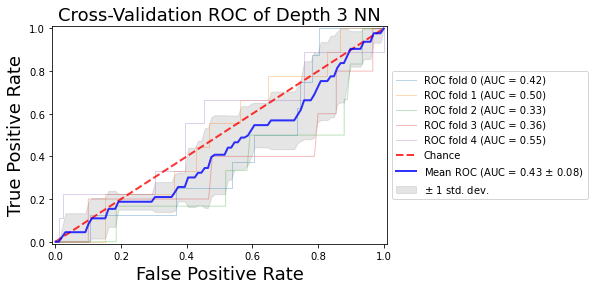

In [31]:
from sklearn.metrics import roc_auc_score
kfold = KFold(n_splits=5, shuffle=True)
inputs = x_d3.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = y_d3.copy()
targets = np.array([np.array(xi) for xi in targets])

n_classes = 19

acc_per_fold = []
f1_per_fold = []
time_per_fold = []


acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb_d3.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

#for i in range(5):
    
    # K-fold Cross Validation model evaluation
fold_no = 1
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    x_test_d3 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    ####################################################################################################
    #test MWPM decoder for this fold
    #labels = targets[train], features = inputs[train]
    #x_test_d3 = translate_to_graph(testData_d3_MWPM, targets[test], mlb_d3)
    decoding_d3, time_mwpm = do_new_decoding(x_test_d3, 3, .03)
    decoding_d3['combine'] = decoding_d3[[0, 1]].values.tolist()
    decoding_d3['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d3 = np.array(decoding_d3[0])

    time_per_fold_mwpm.append(time_mwpm)

    pred_mwpm = mlb_d3.transform(decoding_d3)
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets[test], pred_mwpm, mlb_d3)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets[test], pred_mwpm, average='micro'))


    #####################################################################################################
    #test the plut decoder for this fold

    lookup_d3 = lookup_decoder(3)

    lookup_d3 = train_plut(lookup_d3, inputs_train, targets[train])

    start = time.time_ns()
    pred_plut_d3 = test_plut(lookup_d3, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_plut_d3)
    else:
        acc, contingency_plut = partial_accuracy_and_contingency(targets[test], pred_plut_d3, mlb_d3)

    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1_score(targets[test], pred_plut_d3, average='micro'))

    #####################################################################################################
    #Test the NN decoder for this fold

    model = compile_FFNN_model_DepthThree(3)
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    
    inputs_train = np.asarray(inputs_train).astype(np.int) #CHANGE (added)
    targets[train] = np.asarray(targets[train]).astype(np.int) #CHANGE (added)
    
    history = model.fit(
        inputs_train, targets[train],
        validation_split=.2,
        epochs=200,
        verbose=1)

   # Generate generalization metrics
    inputs_test = np.asarray(inputs_test).astype(np.int) #CHANGE (added)
    targets[test] = np.asarray(targets[test]).astype(np.int) #CHANGE (added)
    
    scores = model.evaluate(inputs_test, targets[test], verbose=0)

    #get the time to predicting test
    start = time.time_ns()
    predictions_d3 = model.predict(inputs_test) #change here
    end = time.time_ns()
    time_per_fold.append((end - start)/ (10 ** 9))

    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d3.copy() #change here
    pred[pred>=.1]=1 
    pred[pred<.1]=0
    
    if fold_no <5:
        acc = scores[1]
    else:
        acc, contingency_nn = partial_accuracy_and_contingency(targets[test], pred, mlb_d3)

    acc_per_fold.append(acc)
    f1_per_fold.append(f1_score(targets[test], pred, average='micro'))

    #####################################################################################################
    #comput ROC AUC for classes and the mircoaverage
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d3.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d3[:, i]) #change here
        aucs_classes[mlb_d3.classes_[i]].append(auc(fpr[i], tpr[i]))
        
    # Increase fold number
    fold_no = fold_no + 1
        
#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb_d3.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
    
############print mean and stdev of AUC of each class#####################      
    
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print("#####################################################################################")
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print("#####################################################################################")
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
print("#####################################################################################")
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 3 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
"""
plt.rcParams.update({'font.size': 22})

model = compile_FFNN_model_DepthThree(3)
print("Fit model on training data")
history = model.fit(
    x=x_train_d3.values,
    y=Y_train_d3,
    validation_split=.25,
    epochs=200
)"""

In [ ]:
"""
# Make a quick epoch vs. loss plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 3 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')"""

In [ ]:
"""
# Make a quick epoch vs. accuracy plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 3 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')"""

In [ ]:
"""
start = time.time()
predictions_d3 = model.predict(x_test_d3.values)
end = time.time()
print("Time: " + str(end - start))
# predict

thresholds=[0.1, .2, .3, .4, .5, .6, .7, .8, .9]
for val in thresholds:
    pred=predictions_d3.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0

    precision = precision_score(Y_test_d3, pred, average='micro')
    recall = recall_score(Y_test_d3, pred, average='micro')
    f1 = f1_score(Y_test_d3, pred, average='micro')
   
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
    print("Accuracy = ",accuracy_score(Y_test_d3, pred))
    print("Partial Accuracy = ",partial_accuracy(Y_test_d3, pred))
    print("\n")"""

------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/800
53/53 [==============================] - 1s 5ms/step - loss: 0.6582 - accuracy: 0.0060 - val_loss: 0.6105 - val_accuracy: 0.0000e+00
Epoch 2/800
53/53 [==============================] - 0s 3ms/step - loss: 0.4293 - accuracy: 0.0060 - val_loss: 0.2688 - val_accuracy: 0.0000e+00
Epoch 3/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1957 - accuracy: 0.0060 - val_loss: 0.2502 - val_accuracy: 0.0306
Epoch 4/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1884 - accuracy: 0.0246 - val_loss: 0.2498 - val_accuracy: 0.0036
Epoch 5/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1874 - accuracy: 0.0186 - val_loss: 0.2504 - val_accuracy: 0.0198
Epoch 6/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1871 - accuracy: 0.0120 - val_loss: 0.2504 - val_accuracy: 0.0559
Epoch 7/800
53/53 [==============================

Epoch 58/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1837 - accuracy: 0.0432 - val_loss: 0.2463 - val_accuracy: 0.0631
Epoch 59/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1837 - accuracy: 0.0691 - val_loss: 0.2457 - val_accuracy: 0.0378
Epoch 60/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1836 - accuracy: 0.0667 - val_loss: 0.2457 - val_accuracy: 0.0559
Epoch 61/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1835 - accuracy: 0.0757 - val_loss: 0.2457 - val_accuracy: 0.0613
Epoch 62/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1833 - accuracy: 0.0619 - val_loss: 0.2452 - val_accuracy: 0.0901
Epoch 63/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1832 - accuracy: 0.0931 - val_loss: 0.2451 - val_accuracy: 0.0360
Epoch 64/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1831 - accuracy: 0.0631 - val_loss: 0.2449 - val_accuracy: 0.0036
Epoch 

53/53 [==============================] - 0s 3ms/step - loss: 0.1671 - accuracy: 0.1459 - val_loss: 0.2223 - val_accuracy: 0.1423
Epoch 116/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1665 - accuracy: 0.1544 - val_loss: 0.2213 - val_accuracy: 0.1477
Epoch 117/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1659 - accuracy: 0.1405 - val_loss: 0.2203 - val_accuracy: 0.1387
Epoch 118/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1654 - accuracy: 0.1423 - val_loss: 0.2196 - val_accuracy: 0.1279
Epoch 119/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1648 - accuracy: 0.1453 - val_loss: 0.2186 - val_accuracy: 0.1369
Epoch 120/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1643 - accuracy: 0.1495 - val_loss: 0.2183 - val_accuracy: 0.1495
Epoch 121/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1637 - accuracy: 0.1495 - val_loss: 0.2175 - val_accuracy: 0.1514
Epoch 122/800

53/53 [==============================] - 0s 3ms/step - loss: 0.1416 - accuracy: 0.1958 - val_loss: 0.1929 - val_accuracy: 0.1477
Epoch 173/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1413 - accuracy: 0.1844 - val_loss: 0.1933 - val_accuracy: 0.1604
Epoch 174/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1409 - accuracy: 0.1940 - val_loss: 0.1924 - val_accuracy: 0.1730
Epoch 175/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1406 - accuracy: 0.1910 - val_loss: 0.1929 - val_accuracy: 0.1712
Epoch 176/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1403 - accuracy: 0.1976 - val_loss: 0.1910 - val_accuracy: 0.1568
Epoch 177/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1400 - accuracy: 0.1892 - val_loss: 0.1911 - val_accuracy: 0.1622
Epoch 178/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1397 - accuracy: 0.1934 - val_loss: 0.1912 - val_accuracy: 0.1766
Epoch 179/800

53/53 [==============================] - 0s 3ms/step - loss: 0.1234 - accuracy: 0.2270 - val_loss: 0.1723 - val_accuracy: 0.1712
Epoch 230/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1230 - accuracy: 0.2288 - val_loss: 0.1719 - val_accuracy: 0.1748
Epoch 231/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 0.2258 - val_loss: 0.1705 - val_accuracy: 0.1676
Epoch 232/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1221 - accuracy: 0.2198 - val_loss: 0.1716 - val_accuracy: 0.1712
Epoch 233/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1221 - accuracy: 0.2378 - val_loss: 0.1699 - val_accuracy: 0.1550
Epoch 234/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1216 - accuracy: 0.2276 - val_loss: 0.1724 - val_accuracy: 0.1658
Epoch 235/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1215 - accuracy: 0.2276 - val_loss: 0.1700 - val_accuracy: 0.1730
Epoch 236/800

53/53 [==============================] - 0s 3ms/step - loss: 0.1087 - accuracy: 0.2565 - val_loss: 0.1564 - val_accuracy: 0.2324
Epoch 287/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1085 - accuracy: 0.2492 - val_loss: 0.1560 - val_accuracy: 0.2162
Epoch 288/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1085 - accuracy: 0.2414 - val_loss: 0.1568 - val_accuracy: 0.2450
Epoch 289/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1083 - accuracy: 0.2480 - val_loss: 0.1575 - val_accuracy: 0.2234
Epoch 290/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1081 - accuracy: 0.2523 - val_loss: 0.1586 - val_accuracy: 0.2631
Epoch 291/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1078 - accuracy: 0.2565 - val_loss: 0.1551 - val_accuracy: 0.2324
Epoch 292/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1076 - accuracy: 0.2505 - val_loss: 0.1541 - val_accuracy: 0.2216
Epoch 293/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0989 - accuracy: 0.2721 - val_loss: 0.1474 - val_accuracy: 0.2847
Epoch 344/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0985 - accuracy: 0.2691 - val_loss: 0.1496 - val_accuracy: 0.2577
Epoch 345/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0988 - accuracy: 0.2625 - val_loss: 0.1461 - val_accuracy: 0.2775
Epoch 346/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.2703 - val_loss: 0.1463 - val_accuracy: 0.2595
Epoch 347/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.2715 - val_loss: 0.1483 - val_accuracy: 0.2811
Epoch 348/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0979 - accuracy: 0.2667 - val_loss: 0.1450 - val_accuracy: 0.2505
Epoch 349/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.2649 - val_loss: 0.1447 - val_accuracy: 0.2577
Epoch 350/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0881 - accuracy: 0.2745 - val_loss: 0.1452 - val_accuracy: 0.2883
Epoch 401/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0883 - accuracy: 0.2799 - val_loss: 0.1480 - val_accuracy: 0.2829
Epoch 402/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0884 - accuracy: 0.2835 - val_loss: 0.1400 - val_accuracy: 0.2577
Epoch 403/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0876 - accuracy: 0.2799 - val_loss: 0.1394 - val_accuracy: 0.2811
Epoch 404/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0875 - accuracy: 0.2763 - val_loss: 0.1412 - val_accuracy: 0.2685
Epoch 405/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0874 - accuracy: 0.2769 - val_loss: 0.1385 - val_accuracy: 0.3009
Epoch 406/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 0.2727 - val_loss: 0.1400 - val_accuracy: 0.3027
Epoch 407/800

53/53 [==============================] - 0s 4ms/step - loss: 0.0816 - accuracy: 0.2967 - val_loss: 0.1370 - val_accuracy: 0.2811
Epoch 458/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0813 - accuracy: 0.2889 - val_loss: 0.1347 - val_accuracy: 0.2865
Epoch 459/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0814 - accuracy: 0.2907 - val_loss: 0.1358 - val_accuracy: 0.2847
Epoch 460/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0811 - accuracy: 0.2937 - val_loss: 0.1363 - val_accuracy: 0.2919
Epoch 461/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0810 - accuracy: 0.2907 - val_loss: 0.1363 - val_accuracy: 0.2775
Epoch 462/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0813 - accuracy: 0.2973 - val_loss: 0.1345 - val_accuracy: 0.2919
Epoch 463/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0808 - accuracy: 0.2961 - val_loss: 0.1367 - val_accuracy: 0.3009
Epoch 464/800

53/53 [==============================] - 0s 4ms/step - loss: 0.0768 - accuracy: 0.2943 - val_loss: 0.1331 - val_accuracy: 0.2847
Epoch 515/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0765 - accuracy: 0.2925 - val_loss: 0.1352 - val_accuracy: 0.2883
Epoch 516/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0766 - accuracy: 0.3009 - val_loss: 0.1338 - val_accuracy: 0.2829
Epoch 517/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0766 - accuracy: 0.2895 - val_loss: 0.1330 - val_accuracy: 0.3009
Epoch 518/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0764 - accuracy: 0.3015 - val_loss: 0.1346 - val_accuracy: 0.2450
Epoch 519/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0765 - accuracy: 0.2913 - val_loss: 0.1324 - val_accuracy: 0.2901
Epoch 520/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0763 - accuracy: 0.2979 - val_loss: 0.1322 - val_accuracy: 0.2667
Epoch 521/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0727 - accuracy: 0.3075 - val_loss: 0.1299 - val_accuracy: 0.3189
Epoch 572/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0726 - accuracy: 0.3099 - val_loss: 0.1287 - val_accuracy: 0.2811
Epoch 573/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0727 - accuracy: 0.3039 - val_loss: 0.1290 - val_accuracy: 0.2937
Epoch 574/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0725 - accuracy: 0.3021 - val_loss: 0.1303 - val_accuracy: 0.2793
Epoch 575/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0724 - accuracy: 0.3099 - val_loss: 0.1289 - val_accuracy: 0.2991
Epoch 576/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0724 - accuracy: 0.3051 - val_loss: 0.1602 - val_accuracy: 0.3009
Epoch 577/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0737 - accuracy: 0.3039 - val_loss: 0.1378 - val_accuracy: 0.3153
Epoch 578/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.3165 - val_loss: 0.1286 - val_accuracy: 0.3099
Epoch 629/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.3201 - val_loss: 0.1268 - val_accuracy: 0.2937
Epoch 630/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0688 - accuracy: 0.3195 - val_loss: 0.1294 - val_accuracy: 0.2883
Epoch 631/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0688 - accuracy: 0.3207 - val_loss: 0.1300 - val_accuracy: 0.2829
Epoch 632/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0688 - accuracy: 0.3135 - val_loss: 0.1288 - val_accuracy: 0.3045
Epoch 633/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.3231 - val_loss: 0.1487 - val_accuracy: 0.1495
Epoch 634/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0695 - accuracy: 0.3171 - val_loss: 0.1289 - val_accuracy: 0.3261
Epoch 635/800

53/53 [==============================] - 0s 4ms/step - loss: 0.0663 - accuracy: 0.3195 - val_loss: 0.1284 - val_accuracy: 0.3225
Epoch 686/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.3315 - val_loss: 0.1413 - val_accuracy: 0.3117
Epoch 687/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0661 - accuracy: 0.3237 - val_loss: 0.1321 - val_accuracy: 0.2739
Epoch 688/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0653 - accuracy: 0.3273 - val_loss: 0.1273 - val_accuracy: 0.3387
Epoch 689/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0652 - accuracy: 0.3189 - val_loss: 0.1242 - val_accuracy: 0.3207
Epoch 690/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.3363 - val_loss: 0.1471 - val_accuracy: 0.2721
Epoch 691/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0664 - accuracy: 0.3243 - val_loss: 0.1303 - val_accuracy: 0.3279
Epoch 692/800

53/53 [==============================] - 0s 4ms/step - loss: 0.0622 - accuracy: 0.3309 - val_loss: 0.1234 - val_accuracy: 0.3207
Epoch 743/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.3255 - val_loss: 0.1228 - val_accuracy: 0.3261
Epoch 744/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0622 - accuracy: 0.3243 - val_loss: 0.1235 - val_accuracy: 0.3225
Epoch 745/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0623 - accuracy: 0.3309 - val_loss: 0.1243 - val_accuracy: 0.3351
Epoch 746/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0623 - accuracy: 0.3315 - val_loss: 0.1224 - val_accuracy: 0.3279
Epoch 747/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.3237 - val_loss: 0.1239 - val_accuracy: 0.3225
Epoch 748/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.3333 - val_loss: 0.1262 - val_accuracy: 0.3189
Epoch 749/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0602 - accuracy: 0.3267 - val_loss: 0.1254 - val_accuracy: 0.3351
Epoch 800/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.3393 - val_loss: 0.1223 - val_accuracy: 0.3009


<ipython-input-32-f01cf9afd9ce>:131: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


------------------------------------------------------------------------
Training for fold 7 ...
Epoch 1/800
53/53 [==============================] - 1s 6ms/step - loss: 0.6354 - accuracy: 0.0306 - val_loss: 0.5378 - val_accuracy: 0.0432
Epoch 2/800
53/53 [==============================] - 0s 3ms/step - loss: 0.3014 - accuracy: 0.0348 - val_loss: 0.2540 - val_accuracy: 0.0090
Epoch 3/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1906 - accuracy: 0.0312 - val_loss: 0.2510 - val_accuracy: 0.0594
Epoch 4/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1878 - accuracy: 0.0535 - val_loss: 0.2498 - val_accuracy: 0.0342
Epoch 5/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1870 - accuracy: 0.0366 - val_loss: 0.2492 - val_accuracy: 0.0414
Epoch 6/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1867 - accuracy: 0.0234 - val_loss: 0.2487 - val_accuracy: 0.0396
Epoch 7/800
53/53 [==============================] - 0s 3

Epoch 58/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1820 - accuracy: 0.0727 - val_loss: 0.2420 - val_accuracy: 0.0342
Epoch 59/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1818 - accuracy: 0.0835 - val_loss: 0.2424 - val_accuracy: 0.0935
Epoch 60/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1817 - accuracy: 0.1147 - val_loss: 0.2419 - val_accuracy: 0.0036
Epoch 61/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1815 - accuracy: 0.0817 - val_loss: 0.2417 - val_accuracy: 0.0522
Epoch 62/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1814 - accuracy: 0.0859 - val_loss: 0.2418 - val_accuracy: 0.0306
Epoch 63/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1812 - accuracy: 0.0913 - val_loss: 0.2419 - val_accuracy: 0.0737
Epoch 64/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1810 - accuracy: 0.1021 - val_loss: 0.2417 - val_accuracy: 0.0234
Epoch 

53/53 [==============================] - 0s 3ms/step - loss: 0.1564 - accuracy: 0.1982 - val_loss: 0.2049 - val_accuracy: 0.2392
Epoch 116/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1556 - accuracy: 0.2060 - val_loss: 0.2056 - val_accuracy: 0.2176
Epoch 117/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1549 - accuracy: 0.2054 - val_loss: 0.2030 - val_accuracy: 0.2338
Epoch 118/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1541 - accuracy: 0.2108 - val_loss: 0.2022 - val_accuracy: 0.2410
Epoch 119/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1533 - accuracy: 0.2114 - val_loss: 0.2012 - val_accuracy: 0.2266
Epoch 120/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1525 - accuracy: 0.2012 - val_loss: 0.2001 - val_accuracy: 0.2212
Epoch 121/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1518 - accuracy: 0.2048 - val_loss: 0.1997 - val_accuracy: 0.2338
Epoch 122/800

53/53 [==============================] - 0s 3ms/step - loss: 0.1228 - accuracy: 0.2811 - val_loss: 0.1639 - val_accuracy: 0.3273
Epoch 173/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1224 - accuracy: 0.2775 - val_loss: 0.1603 - val_accuracy: 0.3795
Epoch 174/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1220 - accuracy: 0.2781 - val_loss: 0.1605 - val_accuracy: 0.3687
Epoch 175/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1216 - accuracy: 0.2691 - val_loss: 0.1601 - val_accuracy: 0.3471
Epoch 176/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1213 - accuracy: 0.2757 - val_loss: 0.1588 - val_accuracy: 0.3345
Epoch 177/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1210 - accuracy: 0.2739 - val_loss: 0.1588 - val_accuracy: 0.3381
Epoch 178/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1206 - accuracy: 0.2727 - val_loss: 0.1589 - val_accuracy: 0.3651
Epoch 179/800

53/53 [==============================] - 0s 3ms/step - loss: 0.1085 - accuracy: 0.2883 - val_loss: 0.1500 - val_accuracy: 0.3381
Epoch 230/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1086 - accuracy: 0.2859 - val_loss: 0.1486 - val_accuracy: 0.3669
Epoch 231/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1083 - accuracy: 0.3051 - val_loss: 0.1477 - val_accuracy: 0.3327
Epoch 232/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1080 - accuracy: 0.2937 - val_loss: 0.1520 - val_accuracy: 0.3489
Epoch 233/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1081 - accuracy: 0.2925 - val_loss: 0.1480 - val_accuracy: 0.3417
Epoch 234/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1077 - accuracy: 0.2913 - val_loss: 0.1471 - val_accuracy: 0.3309
Epoch 235/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1074 - accuracy: 0.2961 - val_loss: 0.1464 - val_accuracy: 0.3453
Epoch 236/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.3069 - val_loss: 0.1378 - val_accuracy: 0.3345
Epoch 287/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0966 - accuracy: 0.2967 - val_loss: 0.1380 - val_accuracy: 0.3363
Epoch 288/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0965 - accuracy: 0.2955 - val_loss: 0.1368 - val_accuracy: 0.3435
Epoch 289/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.3051 - val_loss: 0.1380 - val_accuracy: 0.3291
Epoch 290/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0960 - accuracy: 0.3087 - val_loss: 0.1448 - val_accuracy: 0.3255
Epoch 291/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0964 - accuracy: 0.3033 - val_loss: 0.1377 - val_accuracy: 0.3345
Epoch 292/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0956 - accuracy: 0.2949 - val_loss: 0.1372 - val_accuracy: 0.3291
Epoch 293/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0870 - accuracy: 0.3093 - val_loss: 0.1310 - val_accuracy: 0.3094
Epoch 344/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0870 - accuracy: 0.3141 - val_loss: 0.1382 - val_accuracy: 0.3094
Epoch 345/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 0.3081 - val_loss: 0.1300 - val_accuracy: 0.3417
Epoch 346/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0866 - accuracy: 0.3117 - val_loss: 0.1304 - val_accuracy: 0.3399
Epoch 347/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0866 - accuracy: 0.3105 - val_loss: 0.1305 - val_accuracy: 0.3327
Epoch 348/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0865 - accuracy: 0.3135 - val_loss: 0.1311 - val_accuracy: 0.3345
Epoch 349/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0863 - accuracy: 0.3141 - val_loss: 0.1364 - val_accuracy: 0.3273
Epoch 350/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0801 - accuracy: 0.3255 - val_loss: 0.1252 - val_accuracy: 0.3471
Epoch 401/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0799 - accuracy: 0.3243 - val_loss: 0.1254 - val_accuracy: 0.3381
Epoch 402/800
53/53 [==============================] - 0s 5ms/step - loss: 0.0800 - accuracy: 0.3237 - val_loss: 0.1253 - val_accuracy: 0.3237
Epoch 403/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0799 - accuracy: 0.3255 - val_loss: 0.1259 - val_accuracy: 0.3579
Epoch 404/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0797 - accuracy: 0.3273 - val_loss: 0.1281 - val_accuracy: 0.3417
Epoch 405/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0798 - accuracy: 0.3327 - val_loss: 0.1248 - val_accuracy: 0.3579
Epoch 406/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0794 - accuracy: 0.3315 - val_loss: 0.1232 - val_accuracy: 0.3363
Epoch 407/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0753 - accuracy: 0.3303 - val_loss: 0.1212 - val_accuracy: 0.3561
Epoch 458/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.3375 - val_loss: 0.1218 - val_accuracy: 0.3489
Epoch 459/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.3423 - val_loss: 0.1205 - val_accuracy: 0.3543
Epoch 460/800
53/53 [==============================] - 0s 5ms/step - loss: 0.0744 - accuracy: 0.3375 - val_loss: 0.1230 - val_accuracy: 0.3831
Epoch 461/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0745 - accuracy: 0.3339 - val_loss: 0.1218 - val_accuracy: 0.3471
Epoch 462/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0744 - accuracy: 0.3315 - val_loss: 0.1216 - val_accuracy: 0.3687
Epoch 463/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0744 - accuracy: 0.3237 - val_loss: 0.1213 - val_accuracy: 0.3705
Epoch 464/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0717 - accuracy: 0.3363 - val_loss: 0.1191 - val_accuracy: 0.3813
Epoch 515/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.3327 - val_loss: 0.1197 - val_accuracy: 0.3831
Epoch 516/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0702 - accuracy: 0.3351 - val_loss: 0.1221 - val_accuracy: 0.3777
Epoch 517/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0705 - accuracy: 0.3315 - val_loss: 0.1248 - val_accuracy: 0.3885
Epoch 518/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0706 - accuracy: 0.3423 - val_loss: 0.1187 - val_accuracy: 0.3795
Epoch 519/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0702 - accuracy: 0.3351 - val_loss: 0.1187 - val_accuracy: 0.3975
Epoch 520/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0702 - accuracy: 0.3339 - val_loss: 0.1183 - val_accuracy: 0.3435
Epoch 521/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0671 - accuracy: 0.3273 - val_loss: 0.1157 - val_accuracy: 0.3615
Epoch 572/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.3339 - val_loss: 0.1173 - val_accuracy: 0.4047
Epoch 573/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0668 - accuracy: 0.3393 - val_loss: 0.1212 - val_accuracy: 0.3939
Epoch 574/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0671 - accuracy: 0.3291 - val_loss: 0.1171 - val_accuracy: 0.3417
Epoch 575/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0668 - accuracy: 0.3291 - val_loss: 0.1185 - val_accuracy: 0.3939
Epoch 576/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.3375 - val_loss: 0.1170 - val_accuracy: 0.3975
Epoch 577/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0665 - accuracy: 0.3417 - val_loss: 0.1186 - val_accuracy: 0.3813
Epoch 578/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0639 - accuracy: 0.3381 - val_loss: 0.1151 - val_accuracy: 0.3723
Epoch 629/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0640 - accuracy: 0.3429 - val_loss: 0.1133 - val_accuracy: 0.3885
Epoch 630/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0638 - accuracy: 0.3333 - val_loss: 0.1186 - val_accuracy: 0.3867
Epoch 631/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0638 - accuracy: 0.3333 - val_loss: 0.1213 - val_accuracy: 0.3903
Epoch 632/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0642 - accuracy: 0.3303 - val_loss: 0.1164 - val_accuracy: 0.3849
Epoch 633/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.3297 - val_loss: 0.1229 - val_accuracy: 0.3885
Epoch 634/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0640 - accuracy: 0.3285 - val_loss: 0.1146 - val_accuracy: 0.3615
Epoch 635/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0615 - accuracy: 0.3303 - val_loss: 0.1157 - val_accuracy: 0.4011
Epoch 686/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0611 - accuracy: 0.3399 - val_loss: 0.1138 - val_accuracy: 0.4083
Epoch 687/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0612 - accuracy: 0.3321 - val_loss: 0.1139 - val_accuracy: 0.3975
Epoch 688/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.3291 - val_loss: 0.1133 - val_accuracy: 0.3867
Epoch 689/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.3321 - val_loss: 0.1131 - val_accuracy: 0.4047
Epoch 690/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0609 - accuracy: 0.3321 - val_loss: 0.1161 - val_accuracy: 0.3795
Epoch 691/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.3291 - val_loss: 0.1147 - val_accuracy: 0.3651
Epoch 692/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.3387 - val_loss: 0.1123 - val_accuracy: 0.4101
Epoch 743/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.3357 - val_loss: 0.1142 - val_accuracy: 0.3921
Epoch 744/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0588 - accuracy: 0.3321 - val_loss: 0.1139 - val_accuracy: 0.3813
Epoch 745/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.3393 - val_loss: 0.1111 - val_accuracy: 0.4011
Epoch 746/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0588 - accuracy: 0.3279 - val_loss: 0.1115 - val_accuracy: 0.3867
Epoch 747/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0588 - accuracy: 0.3387 - val_loss: 0.1120 - val_accuracy: 0.3939
Epoch 748/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.3363 - val_loss: 0.1126 - val_accuracy: 0.3993
Epoch 749/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0570 - accuracy: 0.3249 - val_loss: 0.1116 - val_accuracy: 0.3939
Epoch 800/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.3339 - val_loss: 0.1196 - val_accuracy: 0.4191


<ipython-input-32-f01cf9afd9ce>:131: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


------------------------------------------------------------------------
Training for fold 8 ...
Epoch 1/800
53/53 [==============================] - 1s 6ms/step - loss: 0.6530 - accuracy: 0.0222 - val_loss: 0.5957 - val_accuracy: 0.0414
Epoch 2/800
53/53 [==============================] - 0s 3ms/step - loss: 0.3903 - accuracy: 0.0390 - val_loss: 0.2599 - val_accuracy: 0.0396
Epoch 3/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1925 - accuracy: 0.0318 - val_loss: 0.2514 - val_accuracy: 0.0018
Epoch 4/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1877 - accuracy: 0.0216 - val_loss: 0.2503 - val_accuracy: 0.0144
Epoch 5/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1867 - accuracy: 0.0174 - val_loss: 0.2500 - val_accuracy: 0.0468
Epoch 6/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1865 - accuracy: 0.0354 - val_loss: 0.2496 - val_accuracy: 0.0252
Epoch 7/800
53/53 [==============================] - 0s 3

Epoch 58/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1828 - accuracy: 0.0492 - val_loss: 0.2454 - val_accuracy: 0.0000e+00
Epoch 59/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1827 - accuracy: 0.0294 - val_loss: 0.2452 - val_accuracy: 0.0432
Epoch 60/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1826 - accuracy: 0.0685 - val_loss: 0.2454 - val_accuracy: 0.0198
Epoch 61/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1825 - accuracy: 0.0745 - val_loss: 0.2447 - val_accuracy: 0.0773
Epoch 62/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1824 - accuracy: 0.0835 - val_loss: 0.2442 - val_accuracy: 0.0827
Epoch 63/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1823 - accuracy: 0.0715 - val_loss: 0.2448 - val_accuracy: 0.0827
Epoch 64/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1822 - accuracy: 0.0847 - val_loss: 0.2440 - val_accuracy: 0.0324
Ep

53/53 [==============================] - 0s 4ms/step - loss: 0.1673 - accuracy: 0.1459 - val_loss: 0.2229 - val_accuracy: 0.1349
Epoch 116/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1668 - accuracy: 0.1742 - val_loss: 0.2225 - val_accuracy: 0.0773
Epoch 117/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1665 - accuracy: 0.1550 - val_loss: 0.2216 - val_accuracy: 0.1367
Epoch 118/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1659 - accuracy: 0.1964 - val_loss: 0.2212 - val_accuracy: 0.1187
Epoch 119/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1655 - accuracy: 0.1688 - val_loss: 0.2207 - val_accuracy: 0.1475
Epoch 120/800
53/53 [==============================] - 0s 5ms/step - loss: 0.1650 - accuracy: 0.1898 - val_loss: 0.2199 - val_accuracy: 0.1313
Epoch 121/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1645 - accuracy: 0.1880 - val_loss: 0.2191 - val_accuracy: 0.1403
Epoch 122/800

53/53 [==============================] - 0s 4ms/step - loss: 0.1350 - accuracy: 0.2529 - val_loss: 0.1813 - val_accuracy: 0.1996
Epoch 173/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1346 - accuracy: 0.2420 - val_loss: 0.1806 - val_accuracy: 0.2158
Epoch 174/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1341 - accuracy: 0.2517 - val_loss: 0.1802 - val_accuracy: 0.2068
Epoch 175/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1336 - accuracy: 0.2571 - val_loss: 0.1801 - val_accuracy: 0.2572
Epoch 176/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1331 - accuracy: 0.2577 - val_loss: 0.1796 - val_accuracy: 0.2050
Epoch 177/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1327 - accuracy: 0.2541 - val_loss: 0.1788 - val_accuracy: 0.2140
Epoch 178/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1321 - accuracy: 0.2541 - val_loss: 0.1778 - val_accuracy: 0.2212
Epoch 179/800

53/53 [==============================] - 0s 3ms/step - loss: 0.1156 - accuracy: 0.2763 - val_loss: 0.1623 - val_accuracy: 0.2320
Epoch 230/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1153 - accuracy: 0.2727 - val_loss: 0.1618 - val_accuracy: 0.2662
Epoch 231/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1152 - accuracy: 0.2721 - val_loss: 0.1712 - val_accuracy: 0.2104
Epoch 232/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1153 - accuracy: 0.2703 - val_loss: 0.1603 - val_accuracy: 0.2140
Epoch 233/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1147 - accuracy: 0.2715 - val_loss: 0.1610 - val_accuracy: 0.2050
Epoch 234/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1144 - accuracy: 0.2709 - val_loss: 0.1606 - val_accuracy: 0.2428
Epoch 235/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1142 - accuracy: 0.2775 - val_loss: 0.1598 - val_accuracy: 0.2374
Epoch 236/800

53/53 [==============================] - 0s 4ms/step - loss: 0.1032 - accuracy: 0.2763 - val_loss: 0.1501 - val_accuracy: 0.2752
Epoch 287/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1030 - accuracy: 0.2835 - val_loss: 0.1505 - val_accuracy: 0.2482
Epoch 288/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1029 - accuracy: 0.2811 - val_loss: 0.1532 - val_accuracy: 0.2698
Epoch 289/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1027 - accuracy: 0.2817 - val_loss: 0.1523 - val_accuracy: 0.2464
Epoch 290/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1025 - accuracy: 0.2859 - val_loss: 0.1501 - val_accuracy: 0.2806
Epoch 291/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1021 - accuracy: 0.2799 - val_loss: 0.1500 - val_accuracy: 0.2608
Epoch 292/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1020 - accuracy: 0.2859 - val_loss: 0.1510 - val_accuracy: 0.2662
Epoch 293/800

53/53 [==============================] - 0s 4ms/step - loss: 0.0916 - accuracy: 0.2949 - val_loss: 0.1417 - val_accuracy: 0.2914
Epoch 344/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0914 - accuracy: 0.3015 - val_loss: 0.1400 - val_accuracy: 0.2554
Epoch 345/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0913 - accuracy: 0.2943 - val_loss: 0.1397 - val_accuracy: 0.2716
Epoch 346/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0911 - accuracy: 0.2931 - val_loss: 0.1405 - val_accuracy: 0.2806
Epoch 347/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0909 - accuracy: 0.2889 - val_loss: 0.1406 - val_accuracy: 0.2896
Epoch 348/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0906 - accuracy: 0.2919 - val_loss: 0.1457 - val_accuracy: 0.3147
Epoch 349/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0908 - accuracy: 0.2979 - val_loss: 0.1411 - val_accuracy: 0.3004
Epoch 350/800

53/53 [==============================] - 0s 4ms/step - loss: 0.0831 - accuracy: 0.3033 - val_loss: 0.1344 - val_accuracy: 0.2842
Epoch 401/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0829 - accuracy: 0.3033 - val_loss: 0.1372 - val_accuracy: 0.2806
Epoch 402/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0830 - accuracy: 0.3087 - val_loss: 0.1334 - val_accuracy: 0.3022
Epoch 403/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0826 - accuracy: 0.3081 - val_loss: 0.1341 - val_accuracy: 0.2482
Epoch 404/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0827 - accuracy: 0.3027 - val_loss: 0.1379 - val_accuracy: 0.2878
Epoch 405/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0829 - accuracy: 0.3099 - val_loss: 0.1348 - val_accuracy: 0.2788
Epoch 406/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0825 - accuracy: 0.3081 - val_loss: 0.1325 - val_accuracy: 0.2842
Epoch 407/800

53/53 [==============================] - 0s 5ms/step - loss: 0.0774 - accuracy: 0.3129 - val_loss: 0.1336 - val_accuracy: 0.3058
Epoch 458/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0777 - accuracy: 0.3099 - val_loss: 0.1299 - val_accuracy: 0.2914
Epoch 459/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0774 - accuracy: 0.3093 - val_loss: 0.1289 - val_accuracy: 0.2680
Epoch 460/800
53/53 [==============================] - 0s 5ms/step - loss: 0.0774 - accuracy: 0.3069 - val_loss: 0.1293 - val_accuracy: 0.2914
Epoch 461/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0769 - accuracy: 0.3129 - val_loss: 0.1306 - val_accuracy: 0.3147
Epoch 462/800
53/53 [==============================] - 0s 5ms/step - loss: 0.0773 - accuracy: 0.3141 - val_loss: 0.1293 - val_accuracy: 0.2608
Epoch 463/800
53/53 [==============================] - 0s 5ms/step - loss: 0.0770 - accuracy: 0.3189 - val_loss: 0.1289 - val_accuracy: 0.2968
Epoch 464/800

53/53 [==============================] - 0s 4ms/step - loss: 0.0728 - accuracy: 0.3171 - val_loss: 0.1256 - val_accuracy: 0.3219
Epoch 515/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0730 - accuracy: 0.3159 - val_loss: 0.1282 - val_accuracy: 0.3004
Epoch 516/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0729 - accuracy: 0.3105 - val_loss: 0.1282 - val_accuracy: 0.3183
Epoch 517/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0728 - accuracy: 0.3183 - val_loss: 0.1289 - val_accuracy: 0.2932
Epoch 518/800
53/53 [==============================] - 0s 5ms/step - loss: 0.0728 - accuracy: 0.3189 - val_loss: 0.1276 - val_accuracy: 0.3147
Epoch 519/800
53/53 [==============================] - 0s 5ms/step - loss: 0.0725 - accuracy: 0.3195 - val_loss: 0.1282 - val_accuracy: 0.2950
Epoch 520/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0725 - accuracy: 0.3075 - val_loss: 0.1284 - val_accuracy: 0.2896
Epoch 521/800

53/53 [==============================] - 0s 4ms/step - loss: 0.0690 - accuracy: 0.3177 - val_loss: 0.1241 - val_accuracy: 0.3291
Epoch 572/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0687 - accuracy: 0.3171 - val_loss: 0.1238 - val_accuracy: 0.3129
Epoch 573/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0686 - accuracy: 0.3207 - val_loss: 0.1359 - val_accuracy: 0.3543
Epoch 574/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0689 - accuracy: 0.3105 - val_loss: 0.1245 - val_accuracy: 0.3022
Epoch 575/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0685 - accuracy: 0.3117 - val_loss: 0.1244 - val_accuracy: 0.3165
Epoch 576/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0684 - accuracy: 0.3105 - val_loss: 0.1237 - val_accuracy: 0.3309
Epoch 577/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0684 - accuracy: 0.3255 - val_loss: 0.1221 - val_accuracy: 0.3147
Epoch 578/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0652 - accuracy: 0.3201 - val_loss: 0.1265 - val_accuracy: 0.3219
Epoch 629/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0652 - accuracy: 0.3141 - val_loss: 0.1255 - val_accuracy: 0.2986
Epoch 630/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0652 - accuracy: 0.3255 - val_loss: 0.1229 - val_accuracy: 0.3129
Epoch 631/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0650 - accuracy: 0.3111 - val_loss: 0.1255 - val_accuracy: 0.3201
Epoch 632/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0649 - accuracy: 0.3135 - val_loss: 0.1285 - val_accuracy: 0.3147
Epoch 633/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0653 - accuracy: 0.3153 - val_loss: 0.1214 - val_accuracy: 0.3219
Epoch 634/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0646 - accuracy: 0.3171 - val_loss: 0.1223 - val_accuracy: 0.2986
Epoch 635/800

53/53 [==============================] - 0s 4ms/step - loss: 0.0620 - accuracy: 0.3117 - val_loss: 0.1196 - val_accuracy: 0.3201
Epoch 686/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0620 - accuracy: 0.3231 - val_loss: 0.1407 - val_accuracy: 0.2392
Epoch 687/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0630 - accuracy: 0.3129 - val_loss: 0.1243 - val_accuracy: 0.3417
Epoch 688/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0618 - accuracy: 0.3141 - val_loss: 0.1213 - val_accuracy: 0.3237
Epoch 689/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0617 - accuracy: 0.3207 - val_loss: 0.1202 - val_accuracy: 0.3435
Epoch 690/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0618 - accuracy: 0.3165 - val_loss: 0.1188 - val_accuracy: 0.3273
Epoch 691/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0615 - accuracy: 0.3123 - val_loss: 0.1226 - val_accuracy: 0.3201
Epoch 692/800

53/53 [==============================] - 0s 4ms/step - loss: 0.0591 - accuracy: 0.3147 - val_loss: 0.1194 - val_accuracy: 0.3345
Epoch 743/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0590 - accuracy: 0.3135 - val_loss: 0.1205 - val_accuracy: 0.3435
Epoch 744/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0591 - accuracy: 0.3219 - val_loss: 0.1276 - val_accuracy: 0.3004
Epoch 745/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.3159 - val_loss: 0.1231 - val_accuracy: 0.3040
Epoch 746/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0593 - accuracy: 0.3159 - val_loss: 0.1201 - val_accuracy: 0.3255
Epoch 747/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0589 - accuracy: 0.3105 - val_loss: 0.1547 - val_accuracy: 0.2788
Epoch 748/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0607 - accuracy: 0.3009 - val_loss: 0.1198 - val_accuracy: 0.3112
Epoch 749/800

53/53 [==============================] - 0s 5ms/step - loss: 0.0575 - accuracy: 0.3231 - val_loss: 0.1255 - val_accuracy: 0.3219
Epoch 800/800
53/53 [==============================] - 0s 5ms/step - loss: 0.0570 - accuracy: 0.3201 - val_loss: 0.1187 - val_accuracy: 0.2896


<ipython-input-32-f01cf9afd9ce>:131: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


------------------------------------------------------------------------
Training for fold 9 ...
Epoch 1/800
53/53 [==============================] - 1s 5ms/step - loss: 0.6324 - accuracy: 0.0258 - val_loss: 0.5361 - val_accuracy: 0.0288
Epoch 2/800
53/53 [==============================] - 0s 3ms/step - loss: 0.3034 - accuracy: 0.0276 - val_loss: 0.2554 - val_accuracy: 0.0252
Epoch 3/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1908 - accuracy: 0.0294 - val_loss: 0.2516 - val_accuracy: 0.0324
Epoch 4/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1881 - accuracy: 0.0312 - val_loss: 0.2500 - val_accuracy: 0.0018
Epoch 5/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1875 - accuracy: 0.0126 - val_loss: 0.2501 - val_accuracy: 0.0342
Epoch 6/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1874 - accuracy: 0.0354 - val_loss: 0.2503 - val_accuracy: 0.0450
Epoch 7/800
53/53 [==============================] - 0s 3

Epoch 58/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1825 - accuracy: 0.0541 - val_loss: 0.2433 - val_accuracy: 0.0054
Epoch 59/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1823 - accuracy: 0.0739 - val_loss: 0.2434 - val_accuracy: 0.0755
Epoch 60/800
53/53 [==============================] - ETA: 0s - loss: 0.1823 - accuracy: 0.0742 - 0s 3ms/step - loss: 0.1822 - accuracy: 0.0883 - val_loss: 0.2430 - val_accuracy: 0.0468
Epoch 61/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1820 - accuracy: 0.0853 - val_loss: 0.2428 - val_accuracy: 0.0360
Epoch 62/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1818 - accuracy: 0.0841 - val_loss: 0.2429 - val_accuracy: 0.0270
Epoch 63/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1817 - accuracy: 0.0679 - val_loss: 0.2428 - val_accuracy: 0.0468
Epoch 64/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1814 - accuracy: 0.0835 - va

53/53 [==============================] - 0s 3ms/step - loss: 0.1600 - accuracy: 0.2042 - val_loss: 0.2121 - val_accuracy: 0.2050
Epoch 116/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1595 - accuracy: 0.2054 - val_loss: 0.2105 - val_accuracy: 0.1942
Epoch 117/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1590 - accuracy: 0.2036 - val_loss: 0.2097 - val_accuracy: 0.1871
Epoch 118/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1583 - accuracy: 0.2060 - val_loss: 0.2103 - val_accuracy: 0.1835
Epoch 119/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1579 - accuracy: 0.2048 - val_loss: 0.2090 - val_accuracy: 0.1709
Epoch 120/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1573 - accuracy: 0.2072 - val_loss: 0.2091 - val_accuracy: 0.1924
Epoch 121/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1568 - accuracy: 0.2024 - val_loss: 0.2081 - val_accuracy: 0.1745
Epoch 122/800

53/53 [==============================] - 0s 3ms/step - loss: 0.1332 - accuracy: 0.2505 - val_loss: 0.1790 - val_accuracy: 0.2446
Epoch 173/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1328 - accuracy: 0.2517 - val_loss: 0.1796 - val_accuracy: 0.2644
Epoch 174/800
53/53 [==============================] - ETA: 0s - loss: 0.1328 - accuracy: 0.24 - 0s 3ms/step - loss: 0.1324 - accuracy: 0.2589 - val_loss: 0.1785 - val_accuracy: 0.2338
Epoch 175/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1318 - accuracy: 0.2655 - val_loss: 0.1767 - val_accuracy: 0.2680
Epoch 176/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1313 - accuracy: 0.2655 - val_loss: 0.1771 - val_accuracy: 0.2050
Epoch 177/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1309 - accuracy: 0.2595 - val_loss: 0.1761 - val_accuracy: 0.2266
Epoch 178/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1305 - accuracy: 0.2607 - val_loss: 0

53/53 [==============================] - 0s 4ms/step - loss: 0.1135 - accuracy: 0.2859 - val_loss: 0.1590 - val_accuracy: 0.2734
Epoch 230/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1130 - accuracy: 0.2823 - val_loss: 0.1557 - val_accuracy: 0.3183
Epoch 231/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1125 - accuracy: 0.2811 - val_loss: 0.1561 - val_accuracy: 0.3076
Epoch 232/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1123 - accuracy: 0.2871 - val_loss: 0.1558 - val_accuracy: 0.3112
Epoch 233/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1121 - accuracy: 0.2823 - val_loss: 0.1649 - val_accuracy: 0.2950
Epoch 234/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1121 - accuracy: 0.2859 - val_loss: 0.1550 - val_accuracy: 0.3094
Epoch 235/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1115 - accuracy: 0.2811 - val_loss: 0.1548 - val_accuracy: 0.3022
Epoch 236/800

53/53 [==============================] - 0s 4ms/step - loss: 0.1002 - accuracy: 0.3033 - val_loss: 0.1429 - val_accuracy: 0.3363
Epoch 287/800
53/53 [==============================] - 0s 5ms/step - loss: 0.1000 - accuracy: 0.3063 - val_loss: 0.1437 - val_accuracy: 0.3165
Epoch 288/800
53/53 [==============================] - 0s 5ms/step - loss: 0.1000 - accuracy: 0.3027 - val_loss: 0.1448 - val_accuracy: 0.3255
Epoch 289/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0996 - accuracy: 0.3147 - val_loss: 0.1431 - val_accuracy: 0.3129
Epoch 290/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0994 - accuracy: 0.3045 - val_loss: 0.1462 - val_accuracy: 0.3291
Epoch 291/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0993 - accuracy: 0.2973 - val_loss: 0.1422 - val_accuracy: 0.3237
Epoch 292/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0989 - accuracy: 0.3075 - val_loss: 0.1499 - val_accuracy: 0.3579
Epoch 293/800

53/53 [==============================] - 0s 4ms/step - loss: 0.0897 - accuracy: 0.3129 - val_loss: 0.1349 - val_accuracy: 0.3237
Epoch 344/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0897 - accuracy: 0.3129 - val_loss: 0.1400 - val_accuracy: 0.2968
Epoch 345/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0899 - accuracy: 0.3141 - val_loss: 0.1340 - val_accuracy: 0.3273
Epoch 346/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 0.3165 - val_loss: 0.1366 - val_accuracy: 0.3651
Epoch 347/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 0.3111 - val_loss: 0.1342 - val_accuracy: 0.3147
Epoch 348/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0892 - accuracy: 0.3135 - val_loss: 0.1320 - val_accuracy: 0.3129
Epoch 349/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0888 - accuracy: 0.3105 - val_loss: 0.1347 - val_accuracy: 0.3040
Epoch 350/800

53/53 [==============================] - 0s 4ms/step - loss: 0.0827 - accuracy: 0.3207 - val_loss: 0.1297 - val_accuracy: 0.3183
Epoch 401/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0828 - accuracy: 0.3213 - val_loss: 0.1295 - val_accuracy: 0.2896
Epoch 402/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0827 - accuracy: 0.3201 - val_loss: 0.1300 - val_accuracy: 0.3255
Epoch 403/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0824 - accuracy: 0.3201 - val_loss: 0.1280 - val_accuracy: 0.3255
Epoch 404/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0824 - accuracy: 0.3195 - val_loss: 0.1283 - val_accuracy: 0.3543
Epoch 405/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.3147 - val_loss: 0.1314 - val_accuracy: 0.3201
Epoch 406/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0825 - accuracy: 0.3267 - val_loss: 0.1285 - val_accuracy: 0.3327
Epoch 407/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0780 - accuracy: 0.3213 - val_loss: 0.1278 - val_accuracy: 0.3201
Epoch 458/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0783 - accuracy: 0.3147 - val_loss: 0.1258 - val_accuracy: 0.3273
Epoch 459/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0777 - accuracy: 0.3207 - val_loss: 0.1272 - val_accuracy: 0.3112
Epoch 460/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0778 - accuracy: 0.3153 - val_loss: 0.1244 - val_accuracy: 0.3435
Epoch 461/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0775 - accuracy: 0.3183 - val_loss: 0.1259 - val_accuracy: 0.3129
Epoch 462/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0774 - accuracy: 0.3183 - val_loss: 0.1270 - val_accuracy: 0.3273
Epoch 463/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0775 - accuracy: 0.3243 - val_loss: 0.1243 - val_accuracy: 0.3345
Epoch 464/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0736 - accuracy: 0.3081 - val_loss: 0.1221 - val_accuracy: 0.3363
Epoch 515/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.3225 - val_loss: 0.1236 - val_accuracy: 0.3291
Epoch 516/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0732 - accuracy: 0.3243 - val_loss: 0.1331 - val_accuracy: 0.3183
Epoch 517/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.3273 - val_loss: 0.1214 - val_accuracy: 0.3417
Epoch 518/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0729 - accuracy: 0.3225 - val_loss: 0.1219 - val_accuracy: 0.3741
Epoch 519/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.3183 - val_loss: 0.1204 - val_accuracy: 0.3345
Epoch 520/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0728 - accuracy: 0.3255 - val_loss: 0.1233 - val_accuracy: 0.3453
Epoch 521/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0703 - accuracy: 0.3165 - val_loss: 0.1237 - val_accuracy: 0.3453
Epoch 572/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0694 - accuracy: 0.3237 - val_loss: 0.1173 - val_accuracy: 0.3525
Epoch 573/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0691 - accuracy: 0.3189 - val_loss: 0.1183 - val_accuracy: 0.3525
Epoch 574/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0690 - accuracy: 0.3171 - val_loss: 0.1188 - val_accuracy: 0.3525
Epoch 575/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0690 - accuracy: 0.3207 - val_loss: 0.1391 - val_accuracy: 0.3543
Epoch 576/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0700 - accuracy: 0.3171 - val_loss: 0.1180 - val_accuracy: 0.3669
Epoch 577/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0688 - accuracy: 0.3177 - val_loss: 0.1192 - val_accuracy: 0.3417
Epoch 578/800

53/53 [==============================] - 0s 4ms/step - loss: 0.0657 - accuracy: 0.3159 - val_loss: 0.1169 - val_accuracy: 0.3615
Epoch 629/800
53/53 [==============================] - ETA: 0s - loss: 0.0649 - accuracy: 0.32 - 0s 4ms/step - loss: 0.0656 - accuracy: 0.3273 - val_loss: 0.1174 - val_accuracy: 0.3345
Epoch 630/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0657 - accuracy: 0.3183 - val_loss: 0.1178 - val_accuracy: 0.3435
Epoch 631/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.3213 - val_loss: 0.1190 - val_accuracy: 0.3471
Epoch 632/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0658 - accuracy: 0.3147 - val_loss: 0.1178 - val_accuracy: 0.3291
Epoch 633/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.3237 - val_loss: 0.1192 - val_accuracy: 0.3759
Epoch 634/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0656 - accuracy: 0.3225 - val_loss: 0

53/53 [==============================] - 0s 4ms/step - loss: 0.0626 - accuracy: 0.3297 - val_loss: 0.1193 - val_accuracy: 0.3633
Epoch 686/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0628 - accuracy: 0.3273 - val_loss: 0.1174 - val_accuracy: 0.3471
Epoch 687/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.3231 - val_loss: 0.1151 - val_accuracy: 0.3237
Epoch 688/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0627 - accuracy: 0.3201 - val_loss: 0.1161 - val_accuracy: 0.3291
Epoch 689/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.3177 - val_loss: 0.1185 - val_accuracy: 0.3273
Epoch 690/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0632 - accuracy: 0.3243 - val_loss: 0.1142 - val_accuracy: 0.3165
Epoch 691/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0625 - accuracy: 0.3177 - val_loss: 0.1125 - val_accuracy: 0.3579
Epoch 692/800

53/53 [==============================] - 0s 4ms/step - loss: 0.0600 - accuracy: 0.3309 - val_loss: 0.1632 - val_accuracy: 0.3237
Epoch 743/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0613 - accuracy: 0.3213 - val_loss: 0.1215 - val_accuracy: 0.3759
Epoch 744/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.3369 - val_loss: 0.1164 - val_accuracy: 0.3777
Epoch 745/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 0.3315 - val_loss: 0.1183 - val_accuracy: 0.3687
Epoch 746/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0601 - accuracy: 0.3279 - val_loss: 0.1139 - val_accuracy: 0.3489
Epoch 747/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.3303 - val_loss: 0.1155 - val_accuracy: 0.3327
Epoch 748/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0597 - accuracy: 0.3273 - val_loss: 0.1205 - val_accuracy: 0.3633
Epoch 749/800

53/53 [==============================] - 0s 4ms/step - loss: 0.0575 - accuracy: 0.3285 - val_loss: 0.1125 - val_accuracy: 0.3435
Epoch 800/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0575 - accuracy: 0.3351 - val_loss: 0.1143 - val_accuracy: 0.3022


<ipython-input-32-f01cf9afd9ce>:131: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


------------------------------------------------------------------------
Training for fold 10 ...
Epoch 1/800
53/53 [==============================] - 1s 5ms/step - loss: 0.6672 - accuracy: 0.0156 - val_loss: 0.6329 - val_accuracy: 0.0000e+00
Epoch 2/800
53/53 [==============================] - 0s 3ms/step - loss: 0.4964 - accuracy: 0.0066 - val_loss: 0.3117 - val_accuracy: 0.0000e+00
Epoch 3/800
53/53 [==============================] - 0s 3ms/step - loss: 0.2044 - accuracy: 0.0078 - val_loss: 0.2534 - val_accuracy: 0.0000e+00
Epoch 4/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1881 - accuracy: 0.0198 - val_loss: 0.2506 - val_accuracy: 0.0360
Epoch 5/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1869 - accuracy: 0.0282 - val_loss: 0.2502 - val_accuracy: 0.0396
Epoch 6/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1864 - accuracy: 0.0270 - val_loss: 0.2500 - val_accuracy: 0.0594
Epoch 7/800
53/53 [=========================

Epoch 58/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1829 - accuracy: 0.0559 - val_loss: 0.2443 - val_accuracy: 0.0306
Epoch 59/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1829 - accuracy: 0.0721 - val_loss: 0.2452 - val_accuracy: 0.0486
Epoch 60/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1828 - accuracy: 0.0781 - val_loss: 0.2452 - val_accuracy: 0.0773
Epoch 61/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1827 - accuracy: 0.0859 - val_loss: 0.2446 - val_accuracy: 0.0683
Epoch 62/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1826 - accuracy: 0.0811 - val_loss: 0.2445 - val_accuracy: 0.0162
Epoch 63/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1824 - accuracy: 0.0450 - val_loss: 0.2440 - val_accuracy: 0.0324
Epoch 64/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1824 - accuracy: 0.0456 - val_loss: 0.2442 - val_accuracy: 0.0612
Epoch 

53/53 [==============================] - 0s 3ms/step - loss: 0.1692 - accuracy: 0.1574 - val_loss: 0.2259 - val_accuracy: 0.1475
Epoch 116/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1689 - accuracy: 0.1453 - val_loss: 0.2263 - val_accuracy: 0.1187
Epoch 117/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1685 - accuracy: 0.1453 - val_loss: 0.2250 - val_accuracy: 0.1511
Epoch 118/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1681 - accuracy: 0.1459 - val_loss: 0.2245 - val_accuracy: 0.1133
Epoch 119/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1677 - accuracy: 0.1279 - val_loss: 0.2245 - val_accuracy: 0.1871
Epoch 120/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1673 - accuracy: 0.1610 - val_loss: 0.2231 - val_accuracy: 0.1924
Epoch 121/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1669 - accuracy: 0.1778 - val_loss: 0.2225 - val_accuracy: 0.1547
Epoch 122/800

53/53 [==============================] - 0s 3ms/step - loss: 0.1438 - accuracy: 0.2048 - val_loss: 0.1926 - val_accuracy: 0.2446
Epoch 173/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1434 - accuracy: 0.2126 - val_loss: 0.1979 - val_accuracy: 0.2446
Epoch 174/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1432 - accuracy: 0.2120 - val_loss: 0.1914 - val_accuracy: 0.2608
Epoch 175/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1426 - accuracy: 0.2192 - val_loss: 0.1913 - val_accuracy: 0.2284
Epoch 176/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1422 - accuracy: 0.2120 - val_loss: 0.1918 - val_accuracy: 0.2662
Epoch 177/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1417 - accuracy: 0.2204 - val_loss: 0.1902 - val_accuracy: 0.2320
Epoch 178/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1414 - accuracy: 0.2102 - val_loss: 0.1901 - val_accuracy: 0.2302
Epoch 179/800

53/53 [==============================] - 0s 3ms/step - loss: 0.1217 - accuracy: 0.2517 - val_loss: 0.1679 - val_accuracy: 0.2860
Epoch 230/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1212 - accuracy: 0.2492 - val_loss: 0.1681 - val_accuracy: 0.2860
Epoch 231/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1210 - accuracy: 0.2511 - val_loss: 0.1669 - val_accuracy: 0.3129
Epoch 232/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1207 - accuracy: 0.2541 - val_loss: 0.1675 - val_accuracy: 0.3147
Epoch 233/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1204 - accuracy: 0.2571 - val_loss: 0.1682 - val_accuracy: 0.3040
Epoch 234/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1202 - accuracy: 0.2583 - val_loss: 0.1675 - val_accuracy: 0.2788
Epoch 235/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1198 - accuracy: 0.2535 - val_loss: 0.1681 - val_accuracy: 0.3076
Epoch 236/800

53/53 [==============================] - 0s 3ms/step - loss: 0.1071 - accuracy: 0.2727 - val_loss: 0.1526 - val_accuracy: 0.3040
Epoch 287/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.2733 - val_loss: 0.1538 - val_accuracy: 0.3022
Epoch 288/800
53/53 [==============================] - ETA: 0s - loss: 0.1071 - accuracy: 0.26 - 0s 3ms/step - loss: 0.1067 - accuracy: 0.2697 - val_loss: 0.1532 - val_accuracy: 0.3094
Epoch 289/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1064 - accuracy: 0.2739 - val_loss: 0.1505 - val_accuracy: 0.2986
Epoch 290/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1060 - accuracy: 0.2811 - val_loss: 0.1522 - val_accuracy: 0.3147
Epoch 291/800
53/53 [==============================] - 0s 4ms/step - loss: 0.1059 - accuracy: 0.2679 - val_loss: 0.1556 - val_accuracy: 0.3759
Epoch 292/800
53/53 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.2817 - val_loss: 0

53/53 [==============================] - 0s 3ms/step - loss: 0.0948 - accuracy: 0.2865 - val_loss: 0.1416 - val_accuracy: 0.3363
Epoch 344/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0947 - accuracy: 0.2871 - val_loss: 0.1413 - val_accuracy: 0.3345
Epoch 345/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0945 - accuracy: 0.2817 - val_loss: 0.1401 - val_accuracy: 0.3489
Epoch 346/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0943 - accuracy: 0.2847 - val_loss: 0.1410 - val_accuracy: 0.3327
Epoch 347/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 0.2829 - val_loss: 0.1441 - val_accuracy: 0.3363
Epoch 348/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0943 - accuracy: 0.2907 - val_loss: 0.1439 - val_accuracy: 0.2842
Epoch 349/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0944 - accuracy: 0.2781 - val_loss: 0.1407 - val_accuracy: 0.3381
Epoch 350/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0883 - accuracy: 0.3051 - val_loss: 0.1372 - val_accuracy: 0.3741
Epoch 401/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0881 - accuracy: 0.3021 - val_loss: 0.1358 - val_accuracy: 0.3507
Epoch 402/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0878 - accuracy: 0.2931 - val_loss: 0.1370 - val_accuracy: 0.3633
Epoch 403/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0877 - accuracy: 0.3015 - val_loss: 0.1361 - val_accuracy: 0.3471
Epoch 404/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0878 - accuracy: 0.2943 - val_loss: 0.1446 - val_accuracy: 0.3615
Epoch 405/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0881 - accuracy: 0.2973 - val_loss: 0.1358 - val_accuracy: 0.3615
Epoch 406/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0875 - accuracy: 0.2961 - val_loss: 0.1408 - val_accuracy: 0.3561
Epoch 407/800

53/53 [==============================] - 0s 4ms/step - loss: 0.0829 - accuracy: 0.3027 - val_loss: 0.1314 - val_accuracy: 0.3291
Epoch 458/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0828 - accuracy: 0.2973 - val_loss: 0.1327 - val_accuracy: 0.3633
Epoch 459/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0827 - accuracy: 0.3009 - val_loss: 0.1468 - val_accuracy: 0.2608
Epoch 460/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.3021 - val_loss: 0.1339 - val_accuracy: 0.3309
Epoch 461/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0826 - accuracy: 0.2997 - val_loss: 0.1335 - val_accuracy: 0.3543
Epoch 462/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0825 - accuracy: 0.2997 - val_loss: 0.1380 - val_accuracy: 0.2896
Epoch 463/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0827 - accuracy: 0.2949 - val_loss: 0.1382 - val_accuracy: 0.3094
Epoch 464/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0788 - accuracy: 0.3033 - val_loss: 0.1363 - val_accuracy: 0.3885
Epoch 515/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0788 - accuracy: 0.3063 - val_loss: 0.1302 - val_accuracy: 0.3525
Epoch 516/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0786 - accuracy: 0.2979 - val_loss: 0.1328 - val_accuracy: 0.3471
Epoch 517/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0784 - accuracy: 0.3027 - val_loss: 0.1354 - val_accuracy: 0.3201
Epoch 518/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0788 - accuracy: 0.2967 - val_loss: 0.1318 - val_accuracy: 0.3489
Epoch 519/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0782 - accuracy: 0.2979 - val_loss: 0.1313 - val_accuracy: 0.3363
Epoch 520/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0780 - accuracy: 0.3045 - val_loss: 0.1321 - val_accuracy: 0.3399
Epoch 521/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0749 - accuracy: 0.2955 - val_loss: 0.1298 - val_accuracy: 0.3435
Epoch 572/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0749 - accuracy: 0.3033 - val_loss: 0.1270 - val_accuracy: 0.3399
Epoch 573/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.2937 - val_loss: 0.1291 - val_accuracy: 0.3507
Epoch 574/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0747 - accuracy: 0.2955 - val_loss: 0.1299 - val_accuracy: 0.3399
Epoch 575/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0747 - accuracy: 0.2991 - val_loss: 0.1288 - val_accuracy: 0.3597
Epoch 576/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0747 - accuracy: 0.3081 - val_loss: 0.1302 - val_accuracy: 0.3291
Epoch 577/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.3057 - val_loss: 0.1359 - val_accuracy: 0.3597
Epoch 578/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0718 - accuracy: 0.2973 - val_loss: 0.1310 - val_accuracy: 0.3417
Epoch 629/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0719 - accuracy: 0.3069 - val_loss: 0.1254 - val_accuracy: 0.3399
Epoch 630/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0716 - accuracy: 0.2991 - val_loss: 0.1269 - val_accuracy: 0.3651
Epoch 631/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0716 - accuracy: 0.3039 - val_loss: 0.1280 - val_accuracy: 0.3363
Epoch 632/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0716 - accuracy: 0.2967 - val_loss: 0.1258 - val_accuracy: 0.3597
Epoch 633/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0713 - accuracy: 0.3039 - val_loss: 0.1273 - val_accuracy: 0.3561
Epoch 634/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0715 - accuracy: 0.2961 - val_loss: 0.1248 - val_accuracy: 0.3597
Epoch 635/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0687 - accuracy: 0.3039 - val_loss: 0.1270 - val_accuracy: 0.3669
Epoch 686/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.3033 - val_loss: 0.1277 - val_accuracy: 0.3741
Epoch 687/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.3021 - val_loss: 0.1240 - val_accuracy: 0.3579
Epoch 688/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0685 - accuracy: 0.2961 - val_loss: 0.1260 - val_accuracy: 0.3435
Epoch 689/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0684 - accuracy: 0.2997 - val_loss: 0.1353 - val_accuracy: 0.2950
Epoch 690/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0698 - accuracy: 0.2985 - val_loss: 0.1273 - val_accuracy: 0.3705
Epoch 691/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.3021 - val_loss: 0.1253 - val_accuracy: 0.3723
Epoch 692/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 0.3051 - val_loss: 0.1215 - val_accuracy: 0.3597
Epoch 743/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0657 - accuracy: 0.3021 - val_loss: 0.1236 - val_accuracy: 0.3705
Epoch 744/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0657 - accuracy: 0.3009 - val_loss: 0.1595 - val_accuracy: 0.3489
Epoch 745/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0671 - accuracy: 0.2943 - val_loss: 0.1254 - val_accuracy: 0.3327
Epoch 746/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0658 - accuracy: 0.3123 - val_loss: 0.1231 - val_accuracy: 0.3669
Epoch 747/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0654 - accuracy: 0.3009 - val_loss: 0.1243 - val_accuracy: 0.3525
Epoch 748/800
53/53 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.3033 - val_loss: 0.1230 - val_accuracy: 0.3687
Epoch 749/800

53/53 [==============================] - 0s 3ms/step - loss: 0.0629 - accuracy: 0.2997 - val_loss: 0.1239 - val_accuracy: 0.3741
Epoch 800/800
53/53 [==============================] - 0s 4ms/step - loss: 0.0629 - accuracy: 0.3033 - val_loss: 0.1208 - val_accuracy: 0.3471


<ipython-input-32-f01cf9afd9ce>:131: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


[555, 0]
[0, 0]
both b and c are zero
[553, 2]
[0, 0]
[514, 11]
[27, 3]
[501, 24]
[2, 28]
[516, 8]
[30, 1]
[521, 3]
[2, 29]
[534, 6]
[14, 1]
[518, 22]
[4, 11]
[540, 5]
[10, 0]
[521, 24]
[5, 5]
[505, 25]
[16, 9]
[518, 12]
[10, 15]
[505, 25]
[14, 11]
[519, 11]
[6, 19]
[530, 7]
[14, 4]
[521, 16]
[10, 8]
[525, 7]
[19, 4]
[512, 20]
[13, 10]
[532, 11]
[11, 1]
[523, 20]
[7, 5]
[521, 10]
[10, 14]
[516, 15]
[8, 16]
[512, 11]
[11, 21]
[510, 13]
[11, 21]
[528, 11]
[15, 1]
[517, 22]
[7, 9]
[536, 12]
[7, 0]
[529, 19]
[6, 1]
[528, 12]
[11, 4]
[520, 20]
[8, 7]
[510, 23]
[13, 9]
[519, 14]
[1, 21]
[498, 21]
[22, 14]
[509, 10]
[15, 21]
[534, 5]
[11, 5]
[529, 10]
[5, 11]
[532, 5]
[13, 5]
[522, 15]
[4, 14]
[531, 6]
[13, 5]
[517, 20]
[12, 6]
[517, 13]
[6, 19]
[513, 17]
[6, 19]
[515, 13]
[14, 13]
[514, 14]
[16, 11]
[539, 3]
[10, 3]
[523, 19]
[2, 11]
[543, 1]
[9, 2]
[527, 17]
[3, 8]
[542, 4]
[8, 1]
[529, 17]
[4, 5]
[535, 3]
[12, 5]
[525, 13]
[7, 10]
[467, 25]
[33, 30]
[477, 15]
[35, 28]
[515, 5]
[1, 34]
[507

<Figure size 720x720 with 0 Axes>

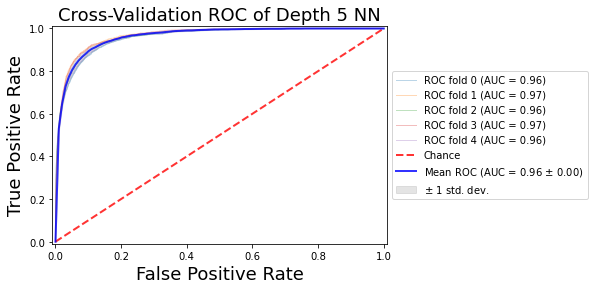

In [32]:
kfold = KFold(n_splits=5, shuffle=True)
inputs = x_d5.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = np.array(y_d5)
#targets = np.stack(targets)
targets = np.array([np.array(xi) for xi in targets])


n_classes = 51

acc_per_fold = []
f1_per_fold = []
time_per_fold = []

acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

# K-fold Cross Validation model evaluation
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    x_test_d5 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    
    ####################################################################################################
    #test MWPM decoder for this fold
    #labels = targets[train], features = inputs[train]
    #x_test_d5 = translate_to_graph(testData_d5_MWPM, targets[test], mlb)
    decoding_d5, time_mwpm = do_new_decoding(x_test_d5, 5, 0)
    decoding_d5['combine'] = decoding_d5[[0, 1]].values.tolist()
    decoding_d5['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d5 = np.array(decoding_d5[0])
                                              
    time_per_fold_mwpm.append(time_mwpm)
                                              
    pred_mwpm = mlb.transform(decoding_d5)
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets[test], pred_mwpm, mlb)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets[test], pred_mwpm, average='micro'))
    
    #####################################################################################################
    #test the plut decoder for this fold
    
    lookup_d5 = lookup_decoder(5)
    
    lookup_d5 = train_plut(lookup_d5, inputs_train, targets[train])
    
    start = time.time_ns()
    pred_plut_d5 = test_plut(lookup_d5, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 5:
        acc = partial_accuracy(targets[test], pred_plut_d5)
    else:
        acc, contingency_plut = partial_accuracy_and_contingency(targets[test], pred_plut_d5, mlb)
        
    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1_score(targets[test], pred_plut_d5, average='micro'))

    #####################################################################################################
    #Test the NN decoder for this fold
    
    model_d5 = compile_FFNN_model_DepthFive(5)
    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    
    inputs_train = np.asarray(inputs_train).astype(np.int) #CHANGE (added)
    targets[train] = np.asarray(targets[train]).astype(np.int) #CHANGE (added)
    
    history = model_d5.fit(
    inputs_train,
    targets[train],
    validation_split=.25,
    epochs = 800
)
   # Generate generalization metrics

    inputs_test = np.asarray(inputs_test).astype(np.int) #CHANGE (added)
    targets[test] = np.asarray(targets[test]).astype(np.int) #CHANGE (added)
    scores = model_d5.evaluate(inputs_test, targets[test], verbose=0)
    
    start = time.time_ns()
    predictions_d5 = model_d5.predict(inputs_test)
    end = time.time_ns() 
    time_per_fold.append((end - start)/ (10 ** 9))
    
    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d5.copy() #change here
    pred[pred>=.4]=1 
    pred[pred<.4]=0
    
    if fold_no < 5:
        acc = scores[1]
    else:
        acc, contingency_nn = partial_accuracy_and_contingency(targets[test], pred, mlb)

    acc_per_fold.append(acc)
    f1_per_fold.append(f1_score(targets[test], pred, average='micro'))

    
    # Increase fold number
    fold_no = fold_no + 1
    
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d5.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d5[:, i]) 
        aucs_classes[mlb.classes_[i]].append(auc(fpr[i], tpr[i]))
        
        
#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print("##############################################################################")
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print("##############################################################################")
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
print("##############################################################################")
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
    
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 5 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/150
7941/7941 [==============================] - 41s 5ms/step - loss: 0.1617 - accuracy: 0.0542 - val_loss: 0.1857 - val_accuracy: 0.1692
Epoch 2/150
7941/7941 [==============================] - 41s 5ms/step - loss: 0.1399 - accuracy: 0.1539 - val_loss: 0.1478 - val_accuracy: 0.2982
Epoch 3/150
7941/7941 [==============================] - 41s 5ms/step - loss: 0.1092 - accuracy: 0.2230 - val_loss: 0.1194 - val_accuracy: 0.3197
Epoch 4/150
7941/7941 [==============================] - 42s 5ms/step - loss: 0.0909 - accuracy: 0.2345 - val_loss: 0.1037 - val_accuracy: 0.3242
Epoch 5/150
7941/7941 [==============================] - 42s 5ms/step - loss: 0.0798 - accuracy: 0.2371 - val_loss: 0.0952 - val_accuracy: 0.3254
Epoch 6/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0727 - accuracy: 0.2345 - val_loss: 0.0892 - val_accuracy: 0.3173
Epoch 7/150
7941/7941 [====

7941/7941 [==============================] - 42s 5ms/step - loss: 0.0363 - accuracy: 0.2324 - val_loss: 0.0492 - val_accuracy: 0.3066
Epoch 57/150
7941/7941 [==============================] - 42s 5ms/step - loss: 0.0362 - accuracy: 0.2317 - val_loss: 0.0491 - val_accuracy: 0.2887
Epoch 58/150
7941/7941 [==============================] - 42s 5ms/step - loss: 0.0360 - accuracy: 0.2326 - val_loss: 0.0493 - val_accuracy: 0.3063
Epoch 59/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0359 - accuracy: 0.2324 - val_loss: 0.0496 - val_accuracy: 0.3034
Epoch 60/150
7941/7941 [==============================] - 42s 5ms/step - loss: 0.0358 - accuracy: 0.2314 - val_loss: 0.0492 - val_accuracy: 0.3074
Epoch 61/150
7941/7941 [==============================] - 42s 5ms/step - loss: 0.0357 - accuracy: 0.2309 - val_loss: 0.0490 - val_accuracy: 0.3240
Epoch 62/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0356 - accuracy: 0.2317 - val_loss: 0.0483 - val_a

7941/7941 [==============================] - 43s 5ms/step - loss: 0.0317 - accuracy: 0.2322 - val_loss: 0.0443 - val_accuracy: 0.2984
Epoch 112/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0316 - accuracy: 0.2334 - val_loss: 0.0448 - val_accuracy: 0.3173
Epoch 113/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0316 - accuracy: 0.2325 - val_loss: 0.0442 - val_accuracy: 0.3122
Epoch 114/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0315 - accuracy: 0.2336 - val_loss: 0.0439 - val_accuracy: 0.3242
Epoch 115/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0315 - accuracy: 0.2338 - val_loss: 0.0449 - val_accuracy: 0.3155
Epoch 116/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0314 - accuracy: 0.2334 - val_loss: 0.0438 - val_accuracy: 0.3023
Epoch 117/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0314 - accuracy: 0.2338 - val_loss: 0.0443 -

<ipython-input-30-b4a9dc4678bb>:145: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/150
7941/7941 [==============================] - 34s 4ms/step - loss: 0.1614 - accuracy: 0.0560 - val_loss: 0.1857 - val_accuracy: 0.1391
Epoch 2/150
7941/7941 [==============================] - 34s 4ms/step - loss: 0.1375 - accuracy: 0.1544 - val_loss: 0.1429 - val_accuracy: 0.2897
Epoch 3/150
7941/7941 [==============================] - 34s 4ms/step - loss: 0.1054 - accuracy: 0.2025 - val_loss: 0.1136 - val_accuracy: 0.3094
Epoch 4/150
7941/7941 [==============================] - 34s 4ms/step - loss: 0.0869 - accuracy: 0.2227 - val_loss: 0.1005 - val_accuracy: 0.3332
Epoch 5/150
7941/7941 [==============================] - 34s 4ms/step - loss: 0.0763 - accuracy: 0.2316 - val_loss: 0.0923 - val_accuracy: 0.3208
Epoch 6/150
7941/7941 [==============================] - 35s 4ms/step - loss: 0.0699 - accuracy: 0.2330 - val_loss: 0.0869 - val_accuracy: 0.3257
Epoch 7/150
7941/7941 [====

7941/7941 [==============================] - 43s 5ms/step - loss: 0.0356 - accuracy: 0.2294 - val_loss: 0.0485 - val_accuracy: 0.3158
Epoch 57/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0355 - accuracy: 0.2291 - val_loss: 0.0486 - val_accuracy: 0.3185
Epoch 58/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0354 - accuracy: 0.2289 - val_loss: 0.0479 - val_accuracy: 0.3264
Epoch 59/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0352 - accuracy: 0.2282 - val_loss: 0.0485 - val_accuracy: 0.3396
Epoch 60/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0351 - accuracy: 0.2287 - val_loss: 0.0490 - val_accuracy: 0.3372
Epoch 61/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0350 - accuracy: 0.2286 - val_loss: 0.0481 - val_accuracy: 0.3302
Epoch 62/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0349 - accuracy: 0.2270 - val_loss: 0.0480 - val_a

Epoch 112/150
7941/7941 [==============================] - 44s 6ms/step - loss: 0.0311 - accuracy: 0.2238 - val_loss: 0.0442 - val_accuracy: 0.3399
Epoch 113/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0311 - accuracy: 0.2234 - val_loss: 0.0439 - val_accuracy: 0.3249
Epoch 114/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0310 - accuracy: 0.2221 - val_loss: 0.0439 - val_accuracy: 0.2976
Epoch 115/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0310 - accuracy: 0.2242 - val_loss: 0.0440 - val_accuracy: 0.3124
Epoch 116/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0309 - accuracy: 0.2238 - val_loss: 0.0440 - val_accuracy: 0.3149
Epoch 117/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0309 - accuracy: 0.2234 - val_loss: 0.0441 - val_accuracy: 0.3221
Epoch 118/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0308 - accuracy: 0.2229 - val_

<ipython-input-30-b4a9dc4678bb>:145: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/150
7941/7941 [==============================] - 40s 5ms/step - loss: 0.1618 - accuracy: 0.0498 - val_loss: 0.1863 - val_accuracy: 0.1152
Epoch 2/150
7941/7941 [==============================] - 40s 5ms/step - loss: 0.1393 - accuracy: 0.1522 - val_loss: 0.1436 - val_accuracy: 0.3128
Epoch 3/150
7941/7941 [==============================] - 40s 5ms/step - loss: 0.1052 - accuracy: 0.2299 - val_loss: 0.1140 - val_accuracy: 0.3430
Epoch 4/150
7941/7941 [==============================] - 41s 5ms/step - loss: 0.0878 - accuracy: 0.2400 - val_loss: 0.1006 - val_accuracy: 0.3355
Epoch 5/150
7941/7941 [==============================] - 41s 5ms/step - loss: 0.0774 - accuracy: 0.2418 - val_loss: 0.0930 - val_accuracy: 0.3378
Epoch 6/150
7941/7941 [==============================] - 41s 5ms/step - loss: 0.0706 - accuracy: 0.2422 - val_loss: 0.0866 - val_accuracy: 0.3471
Epoch 7/150
7941/7941 [====

7941/7941 [==============================] - 42s 5ms/step - loss: 0.0360 - accuracy: 0.2295 - val_loss: 0.0493 - val_accuracy: 0.3043
Epoch 57/150
7941/7941 [==============================] - 42s 5ms/step - loss: 0.0359 - accuracy: 0.2291 - val_loss: 0.0484 - val_accuracy: 0.3251
Epoch 58/150
7941/7941 [==============================] - 42s 5ms/step - loss: 0.0357 - accuracy: 0.2283 - val_loss: 0.0481 - val_accuracy: 0.3284
Epoch 59/150
7941/7941 [==============================] - 42s 5ms/step - loss: 0.0356 - accuracy: 0.2280 - val_loss: 0.0483 - val_accuracy: 0.3186
Epoch 60/150
7941/7941 [==============================] - 42s 5ms/step - loss: 0.0355 - accuracy: 0.2282 - val_loss: 0.0476 - val_accuracy: 0.3128
Epoch 61/150
7941/7941 [==============================] - 42s 5ms/step - loss: 0.0354 - accuracy: 0.2281 - val_loss: 0.0480 - val_accuracy: 0.3134
Epoch 62/150
7941/7941 [==============================] - 42s 5ms/step - loss: 0.0353 - accuracy: 0.2266 - val_loss: 0.0474 - val_a

Epoch 112/150
7941/7941 [==============================] - 42s 5ms/step - loss: 0.0315 - accuracy: 0.2230 - val_loss: 0.0438 - val_accuracy: 0.2926
Epoch 113/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0314 - accuracy: 0.2235 - val_loss: 0.0437 - val_accuracy: 0.2942
Epoch 114/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0314 - accuracy: 0.2232 - val_loss: 0.0429 - val_accuracy: 0.2943
Epoch 115/150
7941/7941 [==============================] - 42s 5ms/step - loss: 0.0313 - accuracy: 0.2241 - val_loss: 0.0441 - val_accuracy: 0.2956
Epoch 116/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0313 - accuracy: 0.2235 - val_loss: 0.0439 - val_accuracy: 0.3071
Epoch 117/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0312 - accuracy: 0.2238 - val_loss: 0.0440 - val_accuracy: 0.3046
Epoch 118/150
7941/7941 [==============================] - 43s 5ms/step - loss: 0.0312 - accuracy: 0.2247 - val_

<ipython-input-30-b4a9dc4678bb>:145: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


[20000, 0]
[0, 0]
both b and c are zero
[20000, 0]
[0, 0]
both b and c are zero
[18599, 472]
[826, 103]
[18703, 368]
[123, 806]
[19360, 292]
[194, 154]
[19067, 585]
[115, 233]
[19719, 154]
[58, 69]
[19216, 657]
[52, 75]
[19772, 124]
[42, 62]
[19267, 629]
[34, 70]
[19688, 207]
[62, 43]
[19239, 656]
[29, 76]
[19592, 294]
[57, 57]
[19254, 632]
[59, 55]
[18139, 1306]
[360, 195]
[18948, 497]
[106, 449]
[18468, 977]
[367, 188]
[19006, 439]
[91, 464]
[19430, 331]
[129, 110]
[19097, 664]
[85, 154]
[19598, 224]
[67, 111]
[19222, 600]
[51, 127]
[19665, 195]
[59, 81]
[19254, 606]
[36, 104]
[19657, 202]
[68, 73]
[19218, 641]
[68, 73]
[19354, 467]
[89, 90]
[19224, 597]
[56, 123]
[18870, 551]
[323, 256]
[18852, 569]
[220, 359]
[19058, 402]
[168, 372]
[19019, 441]
[131, 409]
[19289, 531]
[93, 87]
[19190, 630]
[47, 133]
[19634, 225]
[67, 74]
[19255, 604]
[48, 93]
[19638, 236]
[64, 62]
[19250, 624]
[53, 73]
[19544, 305]
[68, 83]
[19204, 645]
[78, 73]
[19499, 318]
[83, 100]
[19246, 571]
[56, 127]
[18532

<Figure size 720x720 with 0 Axes>

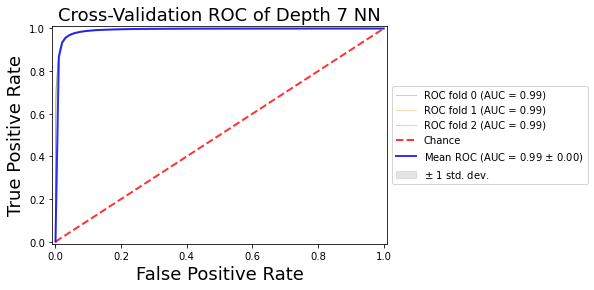

In [30]:
kfold = KFold(n_splits=3, shuffle=True)
inputs = x_d7.copy()
inputs = np.array(inputs)
inputs = np.stack(inputs)
targets = np.array(y_d7)
targets = np.array([np.array(xi) for xi in targets])

n_classes = 99

acc_per_fold = []
f1_per_fold = []
time_per_fold = []

acc_per_fold_plut = []
f1_per_fold_plut = []
time_per_fold_plut = []

acc_per_fold_mwpm = []
f1_per_fold_mwpm = []
time_per_fold_mwpm = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10,10))

aucs_classes = {}
for i in mlb_d7.classes_:
    aucs_classes[i] = []
    
fig, ax = plt.subplots()

# K-fold Cross Validation model evaluation
fold_no = 1
for i, (train, test) in enumerate(kfold.split(inputs, targets)):
    i_train = inputs[train].copy()
    i_test = inputs[test].copy()
    t_test = targets[test].copy()
    x_test_d7 = i_test[:,:2]
    inputs_train = i_train[:,3:]
    inputs_test = i_test[:,3:]
    indices = np.random.choice(inputs[test].shape[0], 20000, replace=False)
    x_test_d7 = x_test_d7[indices]
    inputs_test_2 = inputs_test[indices]
    targets_test_2 = targets[test][indices]
    ####################################################################################################
    #test MWPM decoder for this fold
    #labels = targets[train], features = inputs[train]
   # x_test_d7 = translate_to_graph(testData_d7_MWPM, targs, mlb_d7)
    decoding_d7, time_mwpm = do_new_decoding(x_test_d7, 7, 0)
    decoding_d7['combine'] = decoding_d7[[0, 1]].values.tolist()
    decoding_d7['combine'].apply(lambda x: x[0].extend(x[1]))
    decoding_d7 = np.array(decoding_d7[0])
                                              
    time_per_fold_mwpm.append(time_mwpm)
                                              
    pred_mwpm = mlb_d7.transform(decoding_d7)

    if fold_no < 3:
        acc = partial_accuracy(targets_test_2, pred_mwpm)
    else:
        acc, contingency_mwpm = partial_accuracy_and_contingency(targets_test_2, pred_mwpm, mlb_d7)
        
    acc_per_fold_mwpm.append(acc)
    f1_per_fold_mwpm.append(f1_score(targets_test_2, pred_mwpm, average='micro'))

    #####################################################################################################
    #test the plut decoder for this fold
    
    lookup_d7 = lookup_decoder(7)
    
    lookup_d7 = train_plut(lookup_d7, inputs_train, targets[train])
    
    start = time.time_ns()
    pred_plut_d7 = test_plut(lookup_d7, inputs_test)
    end = time.time_ns() 
    time_per_fold_plut.append((end - start)/ (10 ** 9))
    
    if fold_no < 3:
        acc = partial_accuracy(targets[test], pred_plut_d7)
        f1 = f1_score(targets[test], pred_plut_d7, average='micro')
    else:
        pred_plut_d7 = test_plut(lookup_d7, inputs_test_2)
        f1 = f1_score(targets_test_2, pred_plut_d7, average='micro')
        acc, contingency_plut = partial_accuracy_and_contingency(targets_test_2, pred_plut_d7, mlb_d7)
        
    acc_per_fold_plut.append(acc)
    f1_per_fold_plut.append(f1)
    
    #####################################################################################################
    #Test the NN decoder for this fold
    
    model_d7 = compile_FFNN_model_DepthSeven(7)

    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    
    inputs_train = np.asarray(inputs_train).astype(np.int) #CHANGE (added)
    targets[train] = np.asarray(targets[train]).astype(np.int) #CHANGE (added)
    
    history = model_d7.fit(
        x=inputs_train ,
        y=targets[train],
        validation_split=.25,
        epochs= 150)
    
   # Generate generalization metrics
    
    inputs_test = np.asarray(inputs_test).astype(np.int) #CHANGE (added)
    targets[test] = np.asarray(targets[test]).astype(np.int) #CHANGE (added)
    
    scores = model_d7.evaluate(inputs_test, targets[test], verbose=0)
    
    start = time.time_ns()
    predictions_d7 = model_d7.predict(inputs_test)
    end = time.time_ns() 
    time_per_fold.append((end - start)/ (10 ** 9))
    
    #threshold based on previous tests with train_test_split in hyperparameter tuning
    pred=predictions_d7.copy() #change here
    pred[pred>=.5]=1 
    pred[pred<.5]=0
     
    if fold_no < 3:
        acc = scores[1]
        f1 = f1_score(targets[test], pred, average='micro')
    else:
        inputs_test_2 = np.asarray(inputs_test_2).astype(np.int) #CHANGE (added)
        pred = model_d7.predict(inputs_test_2)
        pred[pred>=.5]=1 
        pred[pred<.5]=0
        acc, contingency_nn = partial_accuracy_and_contingency(targets_test_2, pred, mlb_d7)
        f1 = f1_score(targets_test_2, pred, average='micro')
 
    acc_per_fold.append(acc)
    f1_per_fold.append(f1)

    # Increase fold number
    fold_no = fold_no + 1
    
    fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d7.ravel())
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    #get the AUCs of each class, used to get average AUC of each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d7[:, i]) 
        aucs_classes[mlb_d7.classes_[i]].append(auc(fpr[i], tpr[i]))

#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb_d7.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 7 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('-----------------------------------------------')

In [ ]:
#test MWPM decoder for this fold
#labels = targets[train], features = inputs[train]
# x_test_d7 = translate_to_graph(testData_d7_MWPM, targs, mlb_d7)
"""
decoding_d7, time_mwpm = do_new_decoding(x_test_d7, 7, 0)
decoding_d7['combine'] = decoding_d7[[0, 1]].values.tolist()
decoding_d7['combine'].apply(lambda x: x[0].extend(x[1]))
decoding_d7 = np.array(decoding_d7[0])

time_per_fold_mwpm.append(time_mwpm)

pred_mwpm = mlb_d7.transform(decoding_d7)

if fold_no < 3:
    acc = partial_accuracy(targets_test_2, pred_mwpm)
else:
    acc, contingency_mwpm = partial_accuracy_and_contingency(targets_test_2, pred_mwpm, mlb_d7)"""

#acc_per_fold_mwpm.append(acc)
#f1_per_fold_mwpm.append(f1_score(targets_test_2, pred_mwpm, average='micro'))

#####################################################################################################
#test the plut decoder for this fold

#lookup_d7 = lookup_decoder(7)

#lookup_d7 = train_plut(lookup_d7, inputs_train, targets[train])

#start = time.time_ns()
#pred_plut_d7 = test_plut(lookup_d7, inputs_test)
#end = time.time_ns() 
#time_per_fold_plut.append((end - start)/ (10 ** 9))

pred_plut_d7 = test_plut(lookup_d7, inputs_test_2)
#f1 = f1_score(targets_test_2, pred_plut_d7, average='micro')
acc, contingency_plut = partial_accuracy_and_contingency(targets_test_2, pred_plut_d7, mlb_d7)

#acc_per_fold_plut.append(acc)
#f1_per_fold_plut.append(f1)

#####################################################################################################
#Test the NN decoder for this fold
"""
model_d7 = compile_FFNN_model_DepthSeven(7)

# Generate a print
print('------------------------------------------------------------------------')
print(f'Training for fold {fold_no} ...')

# Fit data to model
history = model_d7.fit(
    x=inputs_train ,
    y=targets[train],
    validation_split=.25,
    epochs= 150)"""

fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d7.ravel())
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

#get the AUCs of each class, used to get average AUC of each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d7[:, i]) 
    aucs_classes[mlb_d7.classes_[i]].append(auc(fpr[i], tpr[i]))

#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb_d7.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 7 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
#test MWPM decoder for this fold
#labels = targets[train], features = inputs[train]
# x_test_d7 = translate_to_graph(testData_d7_MWPM, targs, mlb_d7)
"""
decoding_d7, time_mwpm = do_new_decoding(x_test_d7, 7, 0)
decoding_d7['combine'] = decoding_d7[[0, 1]].values.tolist()
decoding_d7['combine'].apply(lambda x: x[0].extend(x[1]))
decoding_d7 = np.array(decoding_d7[0])

time_per_fold_mwpm.append(time_mwpm)

pred_mwpm = mlb_d7.transform(decoding_d7)

if fold_no < 3:
    acc = partial_accuracy(targets_test_2, pred_mwpm)
else:
    acc, contingency_mwpm = partial_accuracy_and_contingency(targets_test_2, pred_mwpm, mlb_d7)"""

#acc_per_fold_mwpm.append(acc)
#f1_per_fold_mwpm.append(f1_score(targets_test_2, pred_mwpm, average='micro'))

#####################################################################################################
#test the plut decoder for this fold

#lookup_d7 = lookup_decoder(7)

#lookup_d7 = train_plut(lookup_d7, inputs_train, targets[train])

#start = time.time_ns()
#pred_plut_d7 = test_plut(lookup_d7, inputs_test)
#end = time.time_ns() 
#time_per_fold_plut.append((end - start)/ (10 ** 9))

if fold_no < 3:
    acc = partial_accuracy(targets[test], pred_plut_d7)
    f1 = f1_score(targets[test], pred_plut_d7, average='micro')
else:
    pred_plut_d7 = test_plut(lookup_d7, inputs_test_2)
    #f1 = f1_score(targets_test_2, pred_plut_d7, average='micro')
    acc, contingency_plut = partial_accuracy_and_contingency(targets_test_2, pred_plut_d7, mlb_d7)

#acc_per_fold_plut.append(acc)
#f1_per_fold_plut.append(f1)

#####################################################################################################
#Test the NN decoder for this fold
"""
model_d7 = compile_FFNN_model_DepthSeven(7)

# Generate a print
print('------------------------------------------------------------------------')
print(f'Training for fold {fold_no} ...')

# Fit data to model
history = model_d7.fit(
    x=inputs_train ,
    y=targets[train],
    validation_split=.25,
    epochs= 150)"""

pred = model_d7.predict(inputs_test_2)
pred[pred>=.5]=1 
pred[pred<.5]=0
acc, contingency_nn = partial_accuracy_and_contingency(targets_test_2, pred, mlb_d7)
f1 = f1_score(targets_test_2, pred, average='micro')

#acc_per_fold.append(acc)
f1_per_fold.append(f1)

# Increase fold number
fold_no = fold_no + 1

fpr, tpr, thresholds = roc_curve(targets[test].ravel(), predictions_d7.ravel())
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

#get the AUCs of each class, used to get average AUC of each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(targets[test][:, i], predictions_d7[:, i]) 
    aucs_classes[mlb_d7.classes_[i]].append(auc(fpr[i], tpr[i]))

#########################################################################################################
#compute McNemar's statistic on results of last fold

mcnemar_results_mwpm = {}
mcnemar_results_plut = {}

for class_ in mlb_d7.classes_:
    
    #compute the x^2 for NN and MWPM
    mcnemar_results_mwpm[class_]=contingency_table_and_t(contingency_nn[class_], contingency_mwpm[class_])[1]    
    #comput the x^2 for NN and PLUT
    mcnemar_results_plut[class_] = contingency_table_and_t(contingency_nn[class_], contingency_plut[class_])[1]
        
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('------------------------------------------------------------------------')
print('Average scores for all folds of MWPM:')
print(f'> Accuracy: {np.mean(acc_per_fold_mwpm)} (+- {np.std(acc_per_fold_mwpm)})')
print(f'> F1: {np.mean(f1_per_fold_mwpm)}(+- {np.std(f1_per_fold_mwpm)})')
print(f'> Time: {np.mean(time_per_fold_mwpm)} (+- {np.std(time_per_fold_mwpm)})')
print('Average scores for all folds of PLUT:')
print(f'> Accuracy: {np.mean(acc_per_fold_plut)} (+- {np.std(acc_per_fold_plut)})')
print(f'> F1: {np.mean(f1_per_fold_plut)}(+- {np.std(f1_per_fold_plut)})')
print(f'> Time: {np.mean(time_per_fold_plut)} (+- {np.std(time_per_fold_plut)})')
print('Average scores for all folds of NN:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> F1: {np.mean(f1_per_fold)}(+- {np.std(f1_per_fold)})')
print(f'> Time: {np.mean(time_per_fold)} (+- {np.std(time_per_fold)})')
for key in aucs_classes:
    cleanedList = [x for x in aucs_classes[key] if str(x) != 'nan']
    print(f'> AUC for class {key}: {np.mean(cleanedList)} (+- {np.std(cleanedList)})') #this has to be a for loop
    print("X^2 for MWPM and NN: " + str(mcnemar_results_mwpm[key]))  
    print("X^2 for PLUT and NN: " + str(mcnemar_results_plut[key]))
print("###################################################################################")
print("TOTAL F1 NN: " + str(f1_per_fold))
print("TOTAL F1 PLUT: " + str(f1_per_fold_plut))
print("TOTAL F1 MWPM: " + str(f1_per_fold_mwpm))
print("TOTAL ACC NN: " + str(acc_per_fold))
print("TOTAL ACC PLUT: " + str(acc_per_fold_plut))
print("TOTAL ACC MWPM: " + str(acc_per_fold_mwpm))
print("TOTAL TIME NN: " + str(time_per_fold))
print("TOTAL TIME PLUT: " + str(time_per_fold_plut))
print("TOTAL TIME MWPM: " + str(time_per_fold_mwpm))
print('------------------------------------------------------------------------')


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Cross-Validation ROC of Depth 7 NN',fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
"""
model_d5 = compile_FFNN_model_DepthFive(5)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

print("Fit model on training data")
history = model_d5.fit(
    x=x_train_d5.values,
    y=Y_train_d5,
    validation_split=.25,
    epochs = 500
)"""

In [ ]:
"""
# Make a quick epoch vs. loss plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 5 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')"""

In [ ]:
"""
# Make a quick epoch vs. accuracy plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 5 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')"""

In [ ]:
"""
# predict
from sklearn.metrics import precision_score,accuracy_score, f1_score, recall_score, hamming_loss

start = time.time()
predictions_d5 = model_d5.predict(x_test_d5.values)
end = time.time()
print("Time: " + str(end - start))

pred=predictions_d5.copy()

thresholds=[0.1, 0.2, 0.3, .4, .5, .6, .7, .8, .9]
for val in thresholds:
    pred=predictions_d5.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0
    
  
    precision = precision_score(Y_test_d5, pred, average='micro')
    recall = recall_score(Y_test_d5, pred, average='micro')
    f1 = f1_score(Y_test_d5, pred, average='micro')
   
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
    print("Accuracy = ",accuracy_score(Y_test_d5, pred))
    print("Accuracy = ",partial_accuracy(Y_test_d5, pred))
    print("\n")"""

In [ ]:
"""
pred=predictions_d5.copy()
from sklearn.metrics import multilabel_confusion_matrix, classification_report
#look at confusion matrix to see what got misclassified    
pred[pred>=.5]=1
pred[pred<.5]=0
multilabel_confusion_matrix(Y_test_d5, pred)
"""

In [ ]:
"""
#look at classifcation report to see what got mislabeled
print(classification_report(Y_test_d5, pred))
"""

In [ ]:
model_d7 = compile_FFNN_model_DepthSeven(7)
print("Fit model on training data")
history = model_d7.fit(
    x=x_train_d7.values,
    y=Y_train_d7,
    validation_split=.25,
    epochs= 150
)

In [ ]:
# Make a quick epoch vs. loss plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Depth 7 Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')

In [ ]:
# Make a quick epoch vs. accuracy plot
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Depth 7 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [ ]:
""""""
# predict
from sklearn.metrics import precision_score,accuracy_score, f1_score, recall_score, hamming_loss

start = time.time()
predictions_d7 = model_d7.predict(x_test_d7.values)
end = time.time()
print("Time: " + str(end - start))

pred=predictions_d7.copy()


thresholds=[0.1, 0.2, 0.3, .4, .5, .6, .7, .8, .9]
for val in thresholds:
    pred=predictions_d7.copy()
  
    pred[pred>=val]=1
    pred[pred<val]=0
    
  
    precision = precision_score(Y_test_d7, pred, average='micro')
    recall = recall_score(Y_test_d7, pred, average='micro')
    f1 = f1_score(Y_test_d7, pred, average='micro')
   
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
    print("Accuracy = ",accuracy_score(Y_test_d7, pred))
    print("Accuracy = ",partial_accuracy(Y_test_d7, pred))
    print("\n")

In [ ]:
"""
predictions_d7 = model_d7.predict(x_test_d7.values)
pred=predictions_d7.copy()

n_classes = 99

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_d7[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(Y_test_d7.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()"""

In [ ]:
"""
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()"""

In [ ]:
"""
x_train_d3.to_csv("x_train_d3_01.csv")
x_test_d3.to_csv("x_test_d3_01.csv")
pd.DataFrame(Y_train_d3).to_csv("Y_train_d3_01.csv")
pd.DataFrame(Y_test_d3).to_csv("Y_test_d3_01.csv")

x_train_d5.to_csv("x_train_d5_01.csv")
x_test_d5.to_csv("x_test_d5_01.csv")
pd.DataFrame(Y_train_d5).to_csv("Y_train_d5_01.csv")
pd.DataFrame(Y_test_d5).to_csv("Y_test_d5_01.csv")

x_train_d7.to_csv("x_train_d7_01.csv")
x_test_d7.to_csv("x_test_d7_01.csv")
pd.DataFrame(Y_train_d7).to_csv("Y_train_d7_01.csv")
pd.DataFrame(Y_test_d7).to_csv("Y_test_d7_01.csv")"""

In [ ]:
"""
model_d7.save("model_d7_01.h5")
model_d5.save("model_d5_01.h5")
model.save("model_d3_01.h5")"""